<a href="https://colab.research.google.com/github/faezesarlakifar/Unibo-FAIKR-M3-project/blob/main/diabetes_risk_analysis_(lightweight).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @markdown Install Necessary Libraries
!pip install -q pandas numpy pgmpy scikit-learn networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.3 MB/s eta 0:00:00


In [ ]:
!apt-get install -q graphviz libgraphviz-dev pkg-config

In [ ]:
!pip install -q pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# @markdown Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
# @title Load Dataset
import pandas as pd

file_path = "/content/drive/My Drive/diabetes_indicators.csv"

df = pd.read_csv(file_path)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              1.0     0.0       1.0        1.0  23.0     1.0     0.0   
1              0.0     0.0       0.0        1.0  33.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  27.0     1.0     0.0   
3              0.0     0.0       1.0        1.0  29.0     1.0     0.0   
4              1.0     1.0       0.0        1.0  47.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           0.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      4.0       0.0       0.0       0.0  0.0  10.0        4.0   
1          0.0      3.0       0.0       3.0       1.0  0.0  13.0        5.0   
2          0.0      2.0       0.0       5.0       0.0  1.0   8.0        6.0   
3          0.0      3.0       0.0       5.0       0.0  1.0   7.0        5.0   
4          0.0      4.0      30.0      10.0       1.0  1.0   6.0        6.0   

   Income  
0     5.0  
1     4.0  
2     6.0  
3     8.0  
4     3.0  

[5 rows x 22 columns]

In [ ]:
# @markdown Get Features
columns = df.columns

columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [112]:
# @title Discretize Continuous Variables
df['BMI'] = pd.cut(df['BMI'], bins=3, labels=[0, 1, 2])  # Low, Medium, High
df['Age'] = pd.cut(df['Age'], bins=3, labels=[0, 1, 2])  # Young, Middle, Old
df['MentHlth'] = pd.cut(df['MentHlth'], bins=2, labels=[0, 1])  # Good, Bad
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=2, labels=[0, 1])  # Good, Bad

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  float64 
 1   HighBP                70692 non-null  float64 
 2   HighChol              70692 non-null  float64 
 3   CholCheck             70692 non-null  float64 
 4   BMI                   70692 non-null  category
 5   Smoker                70692 non-null  float64 
 6   Stroke                70692 non-null  float64 
 7   HeartDiseaseorAttack  70692 non-null  float64 
 8   PhysActivity          70692 non-null  float64 
 9   Fruits                70692 non-null  float64 
 10  Veggies               70692 non-null  float64 
 11  HvyAlcoholConsump     70692 non-null  float64 
 12  AnyHealthcare         70692 non-null  float64 
 13  NoDocbcCost           70692 non-null  float64 
 14  GenHlth               70692 non-null  float64 
 15  Me

# Design Bayesian Network Manually Based on Domain Knowledge (Literature)

In [ ]:
from pgmpy.models import BayesianNetwork

bn = BayesianNetwork([

    # Blood pressure, cholesterol & heart disease
    ("HighBP", "HeartDiseaseorAttack"),
    ("HighChol", "HeartDiseaseorAttack"),

    # Age-related health risks
    ("Age", "HighBP"),
    ("Age", "HighChol"),
    # ("Age", "HeartDiseaseorAttack"),

    # Heart disease & diabetes link
    ("HeartDiseaseorAttack", "Diabetes_binary"),

    # Diet affecting BMI
    ("Fruits", "BMI"),
    ("Veggies", "BMI"),
    ("Age", "BMI"),
    ("PhysActivity", "BMI"),
    ("BMI", "Diabetes_binary"),
    ("PhysActivity", "Diabetes_binary"),

    # Lifestyle & physical health
    ("Stroke", "PhysHlth"),
    ("DiffWalk", "PhysActivity"),
    ("PhysHlth", "PhysActivity"),

    # Healthcare access & diabetes
    ("Inocme", "NoDocbcCost"),
    ("NoDocbcCost", "Diabetes_binary"),
    ("AnyHealthcare", "Diabetes_binary"),
])

print("Final Bayesian Network defined successfully!")

Final Bayesian Network defined successfully!


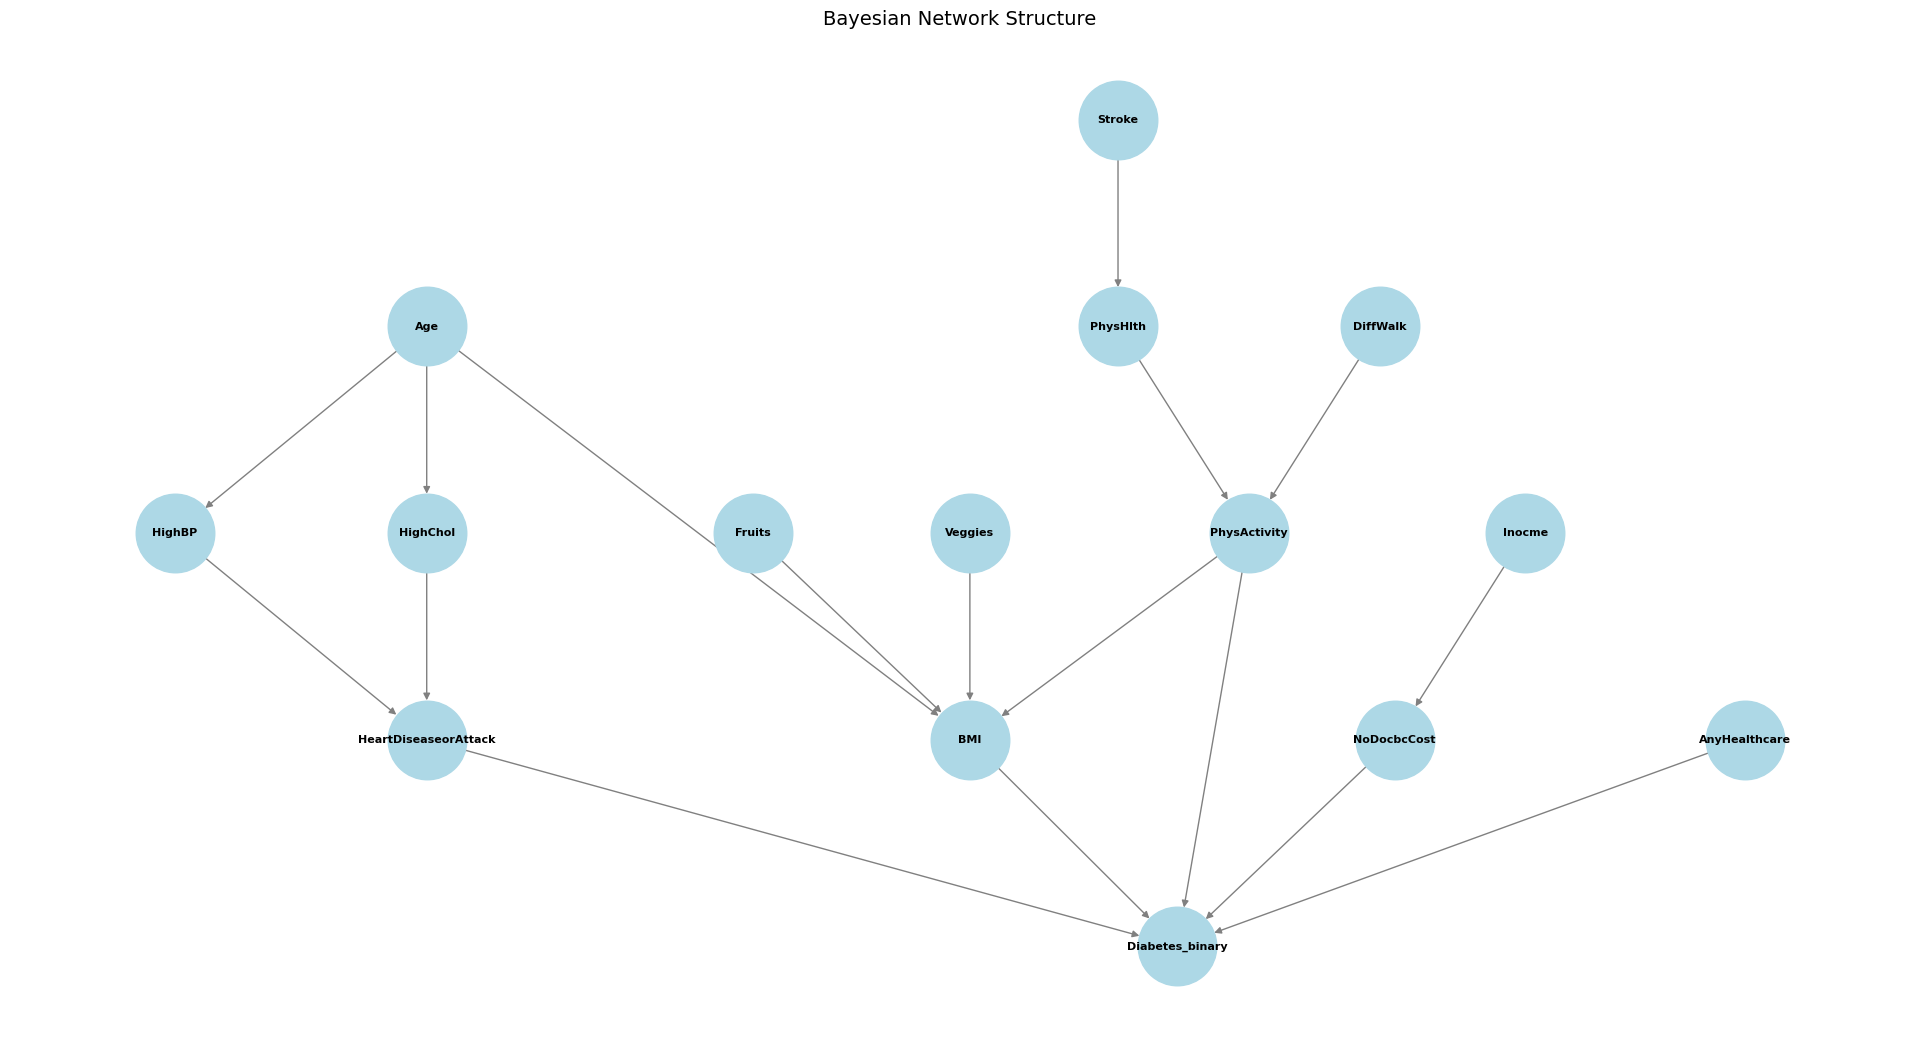

In [ ]:
# @title Plot Bayesian Network based on Domain Knowledge
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Convert BN to a networkx graph
G = nx.DiGraph()
G.add_edges_from(bn.edges())

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

# Draw the Bayesian Network
plt.figure(figsize=(19, 10))
# pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3200, node_color="lightblue", edge_color="gray", font_size=8, font_weight="bold")
plt.title("Bayesian Network Structure", fontsize=14)
plt.show()


In [ ]:
bn_domain_knowledge = bn

# Use Hill Climbing Search to find Causal Relations

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore

hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

# Print learned edges
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'Sex'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighBP', 'Stroke'), ('Smoker', 'Education'), ('Smoker', 'Sex'), ('Smoker', 'GenHlth'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'Age'), ('Smoker', 'Fruits'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('PhysActivity', 'Veggies'), ('PhysActivity', 'Fruits'), ('PhysActivity', 'PhysHlth'), ('Veggies', 'Fruits'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('GenHlth', 'PhysHlth'), ('GenHlth', 'HighBP'), ('GenHlth'

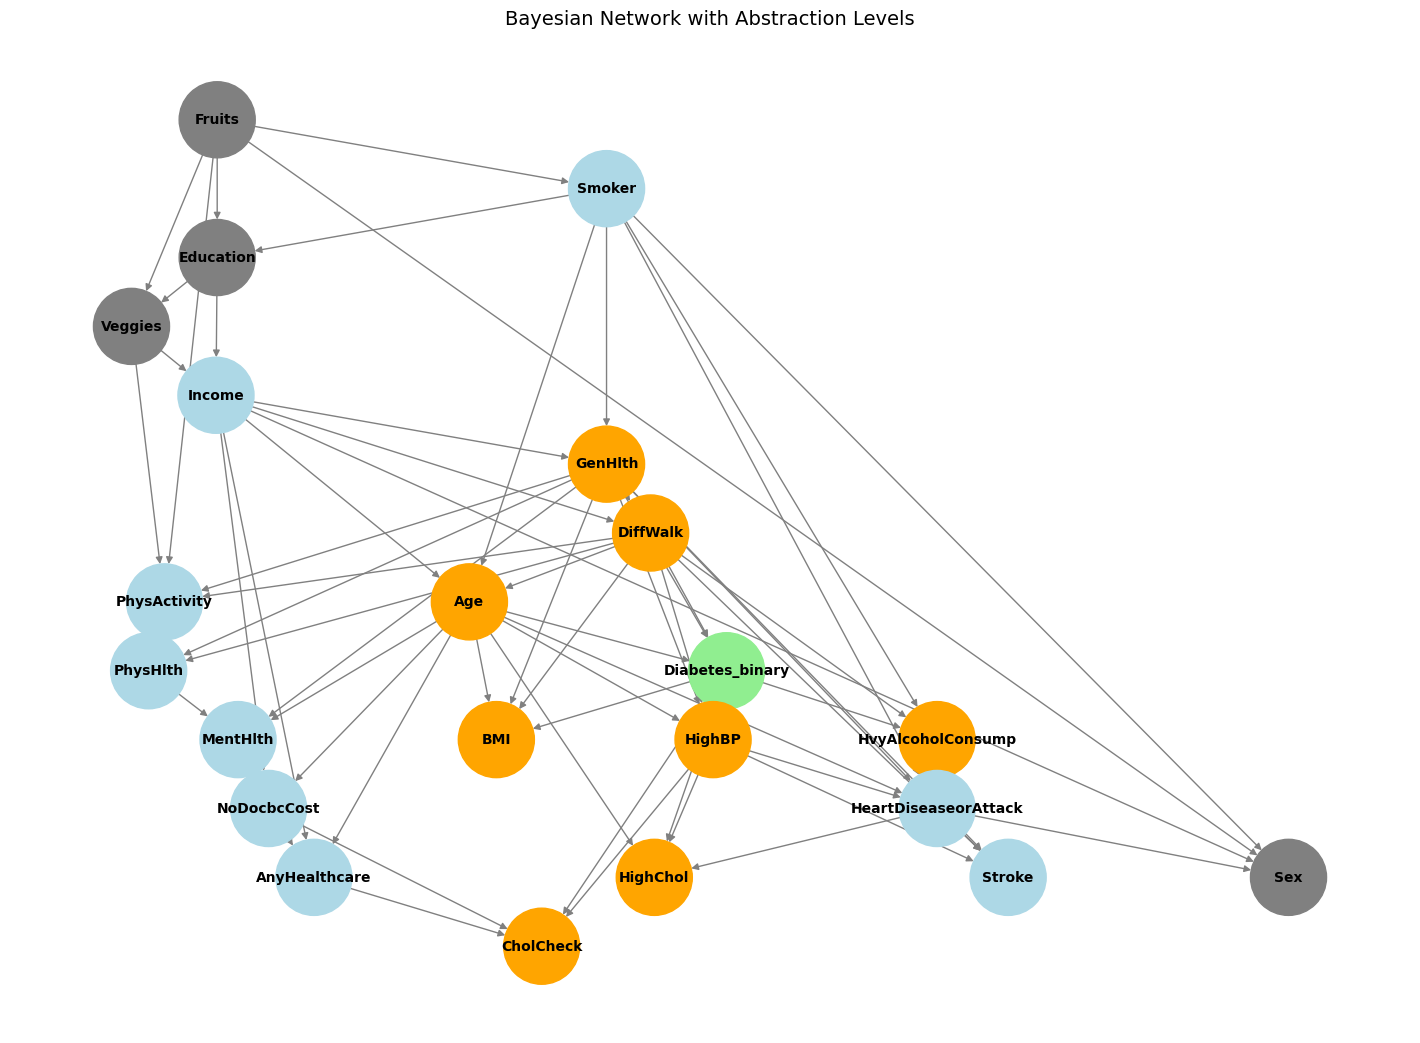

In [ ]:
# @title Plot found causal relations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

plt.figure(figsize=(14, 10))
nx.draw(
    G, pos, with_labels=True,
    node_size=3000,
    node_color=[node_colors[n] for n in G.nodes()],
    font_size=10,
    edge_color="gray",
    font_weight="bold",
    arrows=True
)

plt.title("Bayesian Network with Abstraction Levels", fontsize=14)
plt.show()

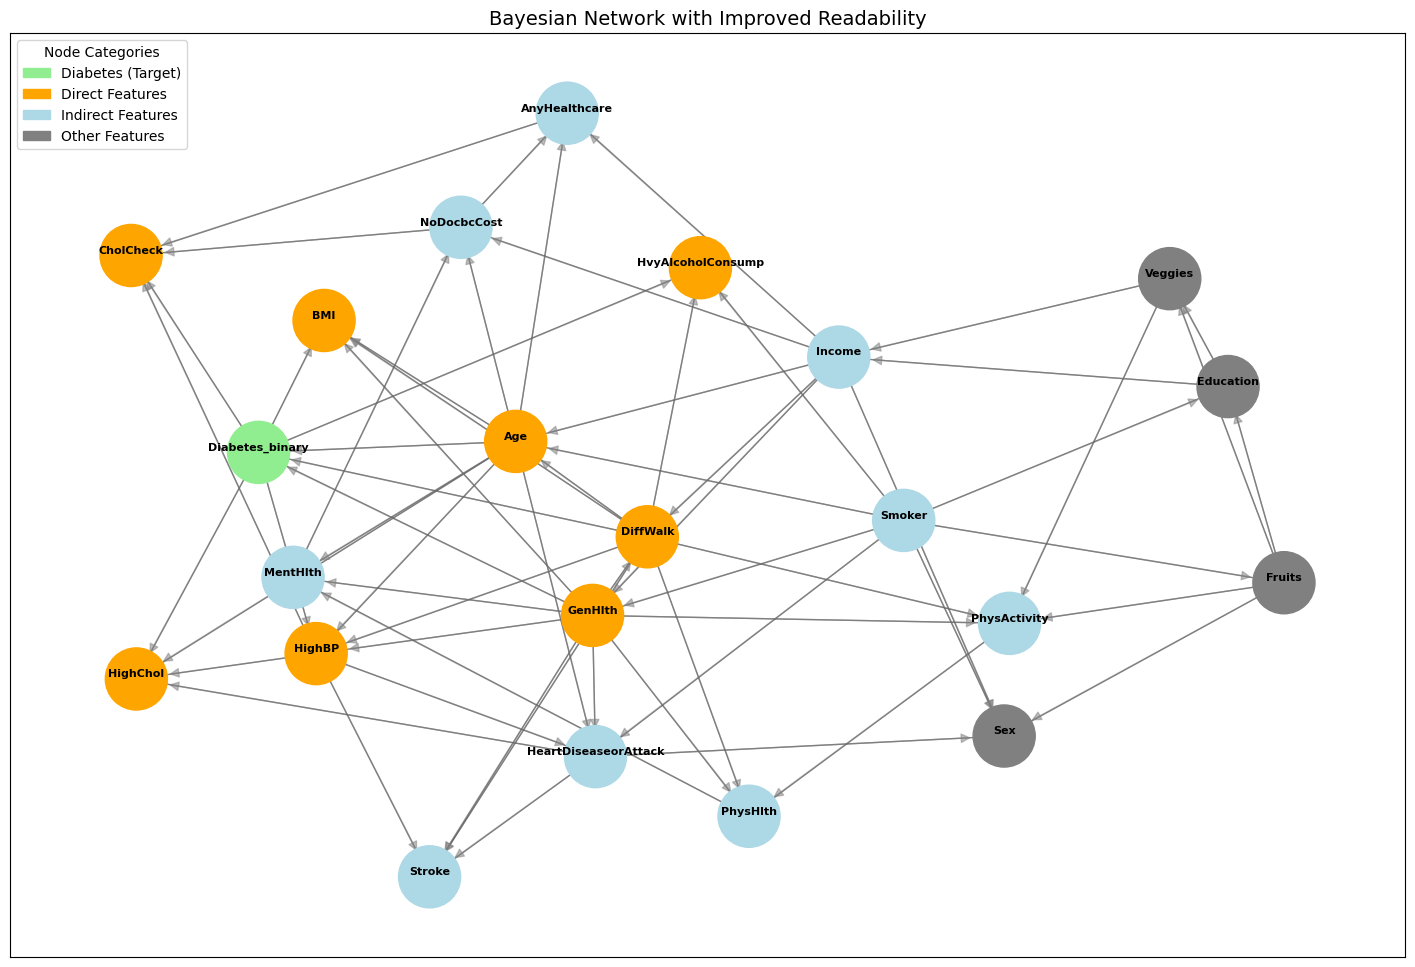

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Bayesian Network with Improved Readability", fontsize=14)

plt.show()

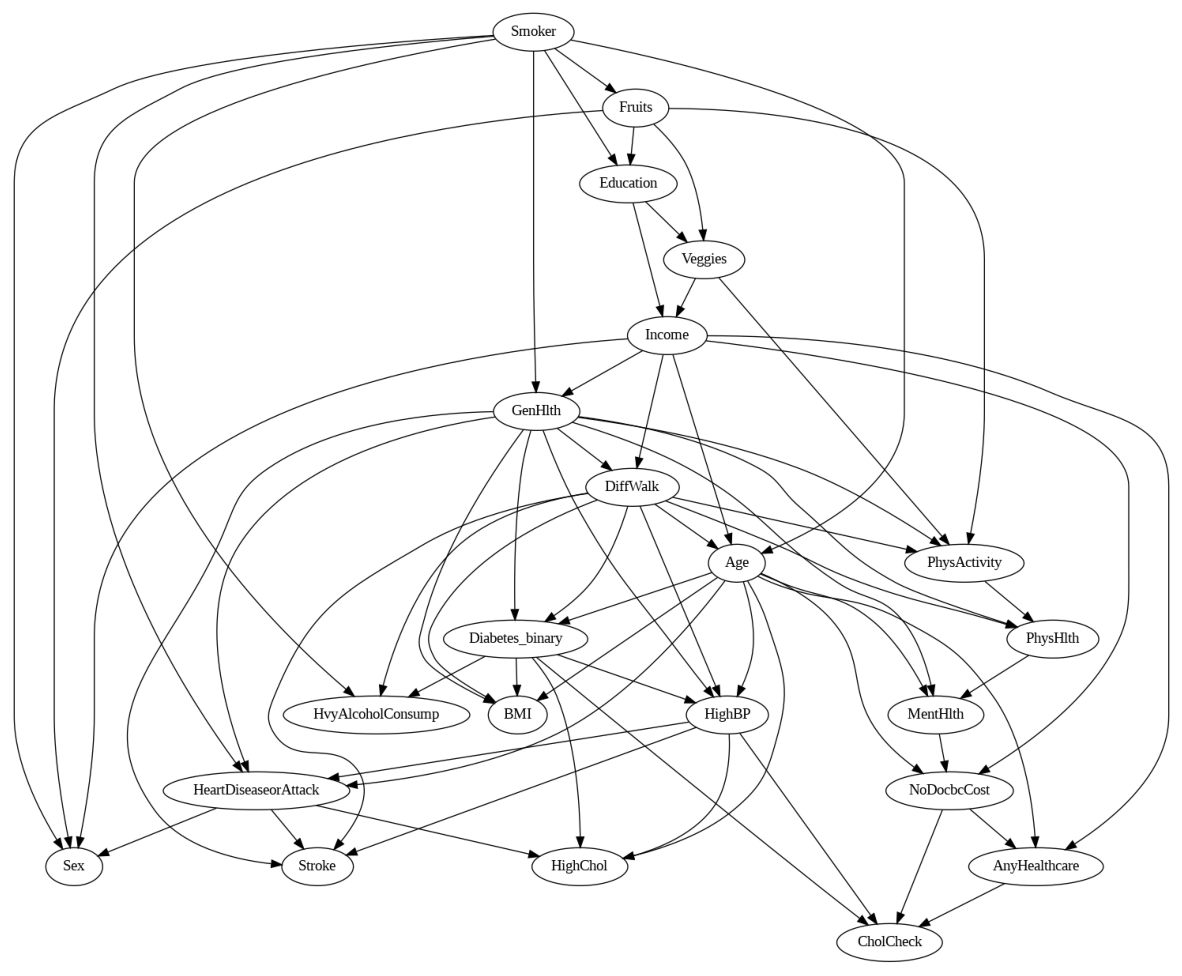

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph

# Convert NetworkX graph to PyGraphviz AGraph (forces proper arrow rendering)
A = to_agraph(G)

# Use "fdp" layout for better spacing (or "dot" for tree-like structure)
A.layout(prog="dot")

A.draw("bayesian_network.png")

plt.figure(figsize=(15, 15))
img = plt.imread("bayesian_network.png")
plt.imshow(img)
plt.axis("off")
plt.show()


# Feature Engineering

## Understanding Feature Contributions with SHAP

Training XGBoost Model on GPU...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:48:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Computing SHAP values...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:48:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


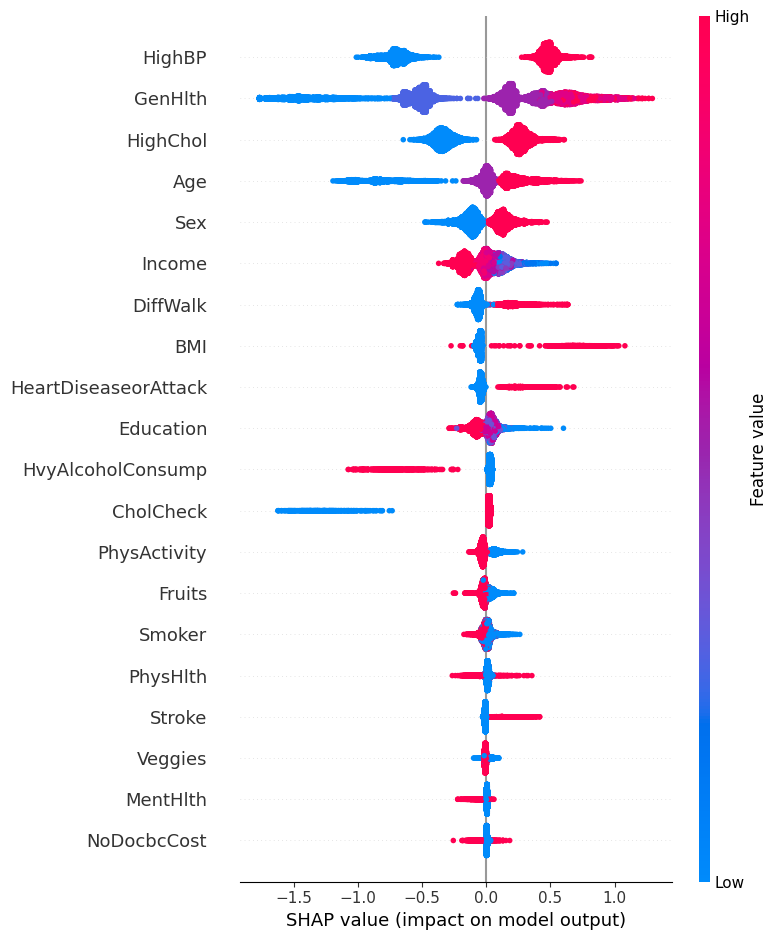

📊 Plotting SHAP dependence for: HighBP


<Figure size 800x600 with 0 Axes>

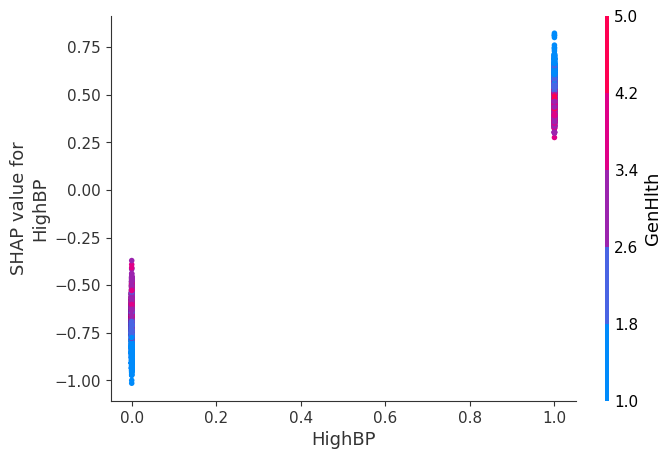

📊 Plotting SHAP dependence for: GenHlth


<Figure size 800x600 with 0 Axes>

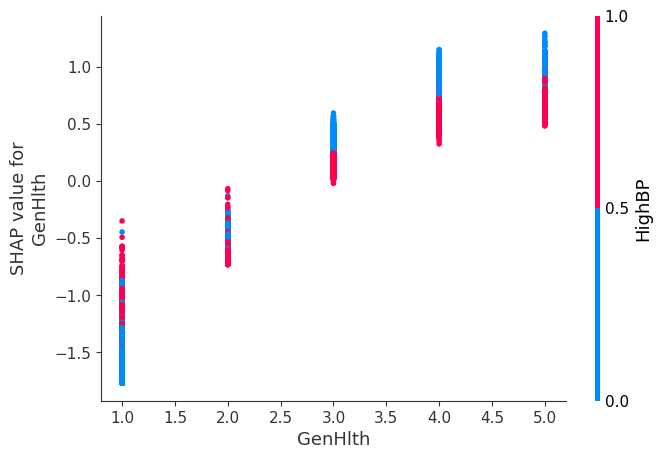

📊 Plotting SHAP dependence for: HighChol


<Figure size 800x600 with 0 Axes>

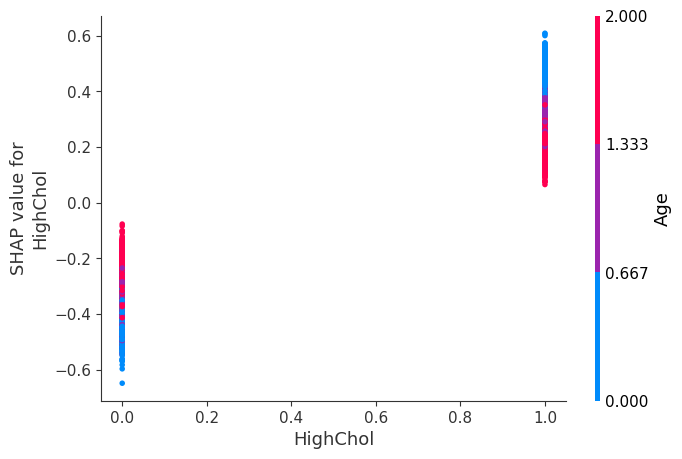

📊 Plotting SHAP dependence for: Age


<Figure size 800x600 with 0 Axes>

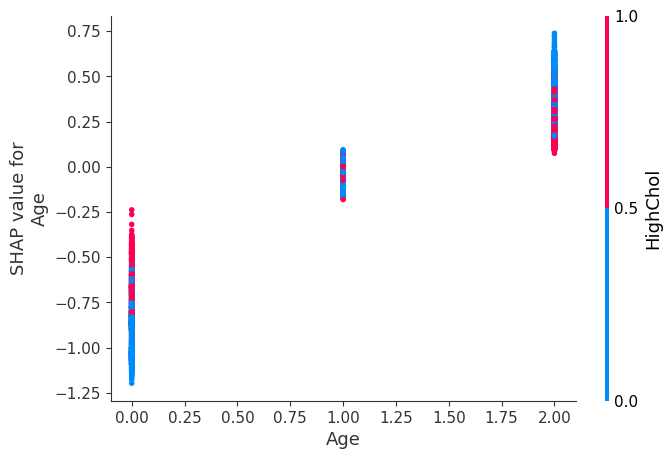

📊 Plotting SHAP dependence for: Sex


<Figure size 800x600 with 0 Axes>

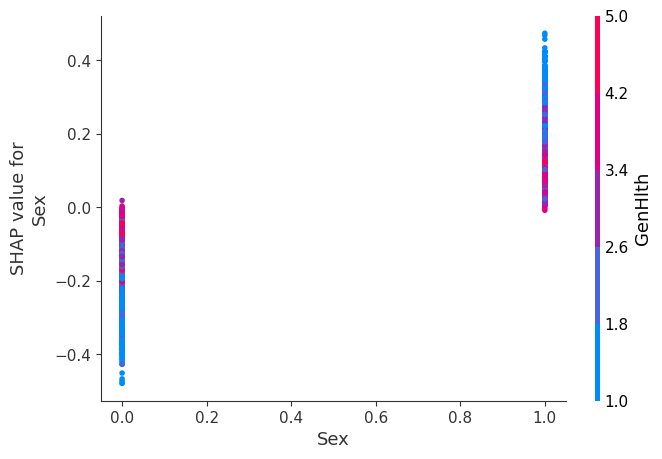

📊 Plotting SHAP dependence for: Income


<Figure size 800x600 with 0 Axes>

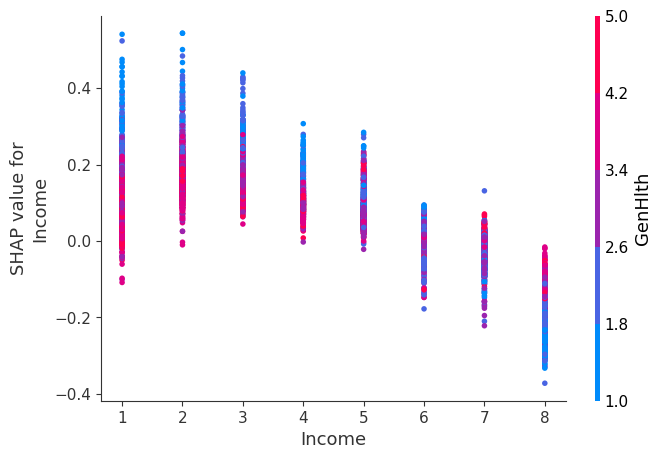

📊 Plotting SHAP dependence for: DiffWalk


<Figure size 800x600 with 0 Axes>

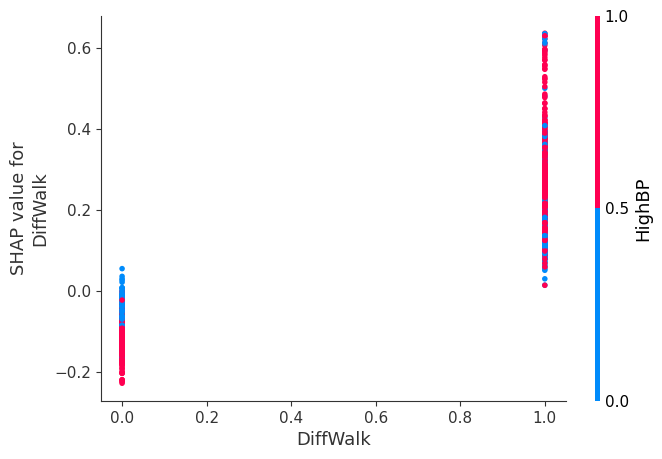

📊 Plotting SHAP dependence for: BMI


<Figure size 800x600 with 0 Axes>

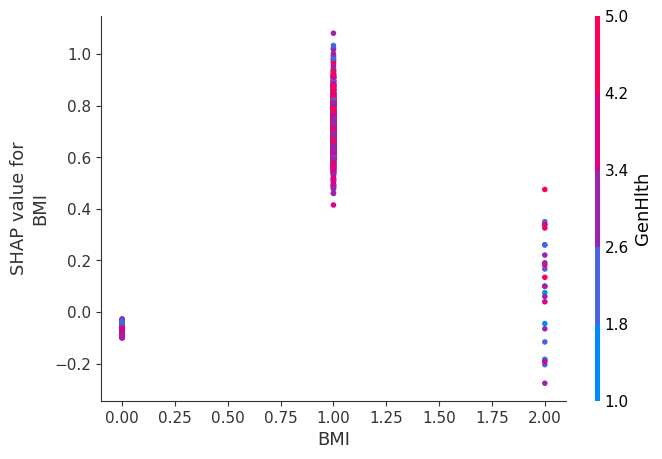

📊 Plotting SHAP dependence for: HeartDiseaseorAttack


<Figure size 800x600 with 0 Axes>

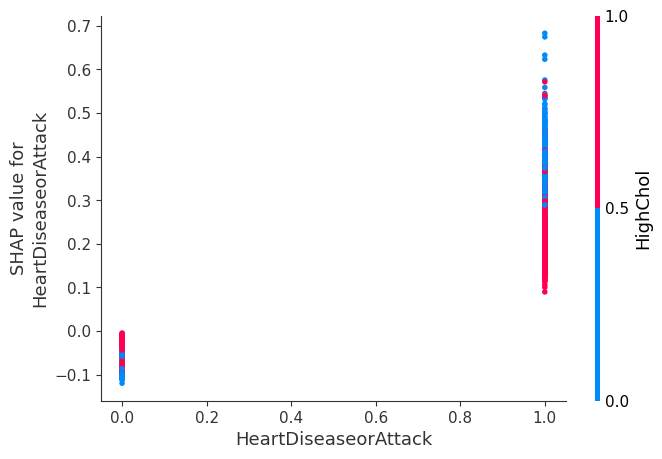

📊 Plotting SHAP dependence for: Education


<Figure size 800x600 with 0 Axes>

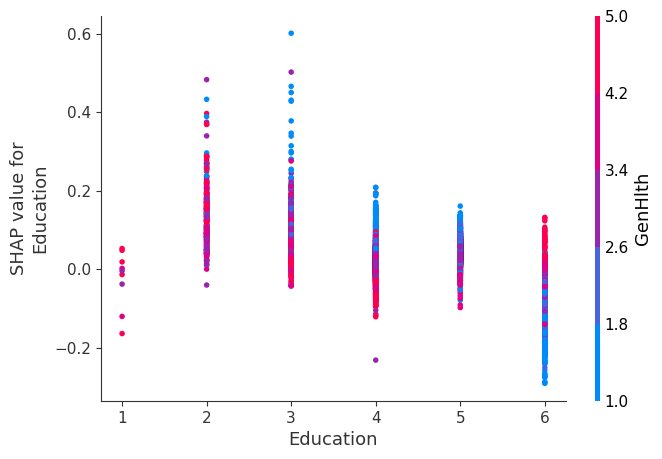

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Enable SHAP JS visualization
shap.initjs()

# Convert categorical variables properly
for col in ['BMI', 'MentHlth', 'PhysHlth', 'Age']:
    df[col] = df[col].astype(float)

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    tree_method="gpu_hist",
    random_state=42
)

print("Training XGBoost Model on GPU...")
xgb_model.fit(X_train, y_train)

# Compute SHAP Values
print("Computing SHAP values...")
explainer = shap.TreeExplainer(xgb_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test, check_additivity=False)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.show()

feature_importance = np.abs(shap_values).mean(axis=0)
 # Top 10 features
important_features = X_test.columns[np.argsort(-feature_importance)[:10]]

for feature in important_features:
    print(f"📊 Plotting SHAP dependence for: {feature}")
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    shap.dependence_plot(feature, shap_values, X_test)
    plt.show()

## Feature Selection using SHAP values

In [ ]:
important_features_df = pd.DataFrame(important_features, columns=["Important Features"])
important_features_df.to_csv("important_features.csv", index=False)

print("✅ Important features saved successfully!")
important_features

✅ Important features saved successfully!


Index(['HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'Income', 'DiffWalk',
       'BMI', 'HeartDiseaseorAttack', 'Education'],
      dtype='object')

In [ ]:
# @markdown Load important features
import pandas as pd

path = "/content/drive/My Drive/dataset_selected_features.csv"
important_features = pd.read_csv(path)

df_selected = important_features

important_features.head()

HighBP  GenHlth  HighChol  Age  Sex  Income  DiffWalk  BMI  \
0     0.0      4.0       1.0  2.0  0.0     5.0       0.0  0.0   
1     0.0      3.0       0.0  2.0  0.0     4.0       1.0  0.0   
2     1.0      2.0       1.0  1.0  1.0     6.0       0.0  0.0   
3     0.0      3.0       1.0  1.0  1.0     8.0       0.0  0.0   
4     1.0      4.0       0.0  1.0  1.0     3.0       1.0  1.0   

   HeartDiseaseorAttack  Education  Diabetes_binary  
0                   0.0        4.0              1.0  
1                   0.0        5.0              0.0  
2                   0.0        6.0              0.0  
3                   0.0        5.0              0.0  
4                   0.0        6.0              1.0

In [ ]:
df_selected = df[important_features.tolist() + ["Diabetes_binary"]]

save_path = "/content/drive/My Drive/dataset_selected_features.csv"
df_selected.to_csv(save_path, index=False)
df_selected.to_csv('df_selected.csv', index=False)

print(f"✅ Filtered dataset saved successfully to Google Drive: {save_path}")

In [ ]:
df_selected.head()

HighBP  GenHlth  HighChol  Age  Sex  Income  DiffWalk  BMI  \
0     0.0      4.0       1.0  2.0  0.0     5.0       0.0  0.0   
1     0.0      3.0       0.0  2.0  0.0     4.0       1.0  0.0   
2     1.0      2.0       1.0  1.0  1.0     6.0       0.0  0.0   
3     0.0      3.0       1.0  1.0  1.0     8.0       0.0  0.0   
4     1.0      4.0       0.0  1.0  1.0     3.0       1.0  1.0   

   HeartDiseaseorAttack  Education  Diabetes_binary  
0                   0.0        4.0              1.0  
1                   0.0        5.0              0.0  
2                   0.0        6.0              0.0  
3                   0.0        5.0              0.0  
4                   0.0        6.0              1.0

## Feature Selection using Mutual Info

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

mi_scores = mutual_info_classif(df.drop(columns=["Diabetes_binary"]), df["Diabetes_binary"])

mi_scores_dict = dict(zip(df.columns[:-1], mi_scores))
sorted_features = sorted(mi_scores_dict, key=mi_scores_dict.get, reverse=True)

top_n = 10
selected_features_mi = sorted_features[:top_n]

df_selected_mi = df[selected_features_mi + ["Diabetes_binary"]]

print(f"✅ Selected Features (Mutual Information): {selected_features_mi}")

✅ Selected Features (Mutual Information): ['NoDocbcCost', 'Diabetes_binary', 'HighBP', 'Sex', 'PhysHlth', 'Education', 'Stroke', 'HeartDiseaseorAttack', 'MentHlth', 'Age']


In [ ]:
save_path = "/content/drive/My Drive/dataset_selected_features_mi.csv"
df_selected_mi.to_csv(save_path, index=False)
df_selected_mi.to_csv('df_selected_mi.csv', index=False)

print(f"✅ Filtered dataset saved successfully to Google Drive: {save_path}")

✅ Filtered dataset saved successfully to Google Drive: /content/drive/My Drive/dataset_selected_features_mi.csv


## Compare Selected Features

In [ ]:
shap_top_features = important_features
mi_top_features = selected_features_mi

In [ ]:
common_features = shap_top_features.intersection(mi_top_features)
print(f"📊 Common Features: {common_features}")

📊 Common Features: Index(['HighBP', 'Age', 'Sex', 'HeartDiseaseorAttack', 'Education'], dtype='object')


In [ ]:
!pip install -q matplotlib-venn

In [ ]:
type(shap_top_features)

pandas.core.indexes.base.Index

In [ ]:
type(mi_top_features)

list

In [ ]:
shap_features_set = set(shap_top_features)
mi_features_set = set(mi_top_features)

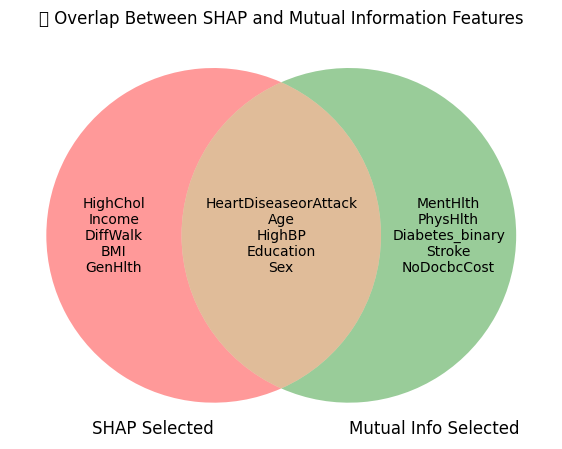

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

common_features = shap_features_set & mi_features_set
shap_unique = shap_features_set - mi_features_set
mi_unique = mi_features_set - shap_features_set

plt.figure(figsize=(7,7))
venn = venn2([shap_features_set, mi_features_set], ("SHAP Selected", "Mutual Info Selected"))
plt.title("Overlap Between SHAP and Mutual Information Features")

venn.get_label_by_id("10").set_text("\n".join(shap_unique))  # SHAP only
venn.get_label_by_id("01").set_text("\n".join(mi_unique))  # Mutual Info only
venn.get_label_by_id("11").set_text("\n".join(common_features))  # Common features

plt.show()

# Parameter Learning (Estimate Probabilities)

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the Bayesian Model with learned structure
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(best_model.edges())

# Learn CPDs
model.fit(df, estimator=MaximumLikelihoodEstimator)

for cpd in model.cpds:
    print(cpd)

+----------------------+--------------------+-----+---------------------+---------------------+
| Age                  | Age(0)             | ... | Age(2)              | Age(2)              |
+----------------------+--------------------+-----+---------------------+---------------------+
| DiffWalk             | DiffWalk(0.0)      | ... | DiffWalk(1.0)       | DiffWalk(1.0)       |
+----------------------+--------------------+-----+---------------------+---------------------+
| GenHlth              | GenHlth(1.0)       | ... | GenHlth(4.0)        | GenHlth(5.0)        |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(0.0) | 0.9702970297029703 | ... | 0.20440821256038647 | 0.17121588089330025 |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(1.0) | 0.0297029702970297 | ... | 0.7955917874396136  | 0.8287841191066998  |
+----------------------+----------------

## Simple Inference

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

# Example: P(Diabetes | HighBP=1, BMI=High)
prob_diabetes = inference.query(variables=["Diabetes_binary"], evidence={"HighBP": 1, "BMI": 2})
print(prob_diabetes)


+----------------------+------------------------+
| Diabetes_binary      |   phi(Diabetes_binary) |
+======================+========================+
| Diabetes_binary(0.0) |                 0.2955 |
+----------------------+------------------------+
| Diabetes_binary(1.0) |                 0.7045 |
+----------------------+------------------------+


## Visualize CPDs

In [ ]:
print(model.get_cpds("Diabetes_binary"))

+----------------------+--------------------+-----+---------------------+---------------------+
| Age                  | Age(0)             | ... | Age(2)              | Age(2)              |
+----------------------+--------------------+-----+---------------------+---------------------+
| DiffWalk             | DiffWalk(0.0)      | ... | DiffWalk(1.0)       | DiffWalk(1.0)       |
+----------------------+--------------------+-----+---------------------+---------------------+
| GenHlth              | GenHlth(1.0)       | ... | GenHlth(4.0)        | GenHlth(5.0)        |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(0.0) | 0.9702970297029703 | ... | 0.20440821256038647 | 0.17121588089330025 |
+----------------------+--------------------+-----+---------------------+---------------------+
| Diabetes_binary(1.0) | 0.0297029702970297 | ... | 0.7955917874396136  | 0.8287841191066998  |
+----------------------+----------------

In [ ]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cpd_diabetes = model.get_cpds("Diabetes_binary")

parents = cpd_diabetes.variables[1:]
parent_cardinalities = cpd_diabetes.cardinality[1:]

# Generate all possible parent state combinations
parent_states = list(itertools.product(*[range(c) for c in parent_cardinalities]))

cpd_df = pd.DataFrame(
    cpd_diabetes.values.reshape(len(parent_states), -1),  # Reshape CPD values
    columns=["Diabetes=0", "Diabetes=1"],  # Column names
)[["Diabetes=1"]]  # Select Diabetes=1

# Create meaningful row labels by combining parent feature names and states
cpd_df.index = [
    ", ".join(f"{feature}={state}" for feature, state in zip(parents, state_comb))
    for state_comb in parent_states
]

cpd_df

Diabetes=1
Age=0, DiffWalk=0, GenHlth=0    0.905040
Age=0, DiffWalk=0, GenHlth=1    0.487377
Age=0, DiffWalk=0, GenHlth=2    0.650000
Age=0, DiffWalk=0, GenHlth=3    0.545064
Age=0, DiffWalk=0, GenHlth=4    0.307359
Age=0, DiffWalk=1, GenHlth=0    0.721383
Age=0, DiffWalk=1, GenHlth=1    0.289092
Age=0, DiffWalk=1, GenHlth=2    0.602273
Age=0, DiffWalk=1, GenHlth=3    0.331162
Age=0, DiffWalk=1, GenHlth=4    0.205699
Age=1, DiffWalk=0, GenHlth=0    0.558314
Age=1, DiffWalk=0, GenHlth=1    0.244100
Age=1, DiffWalk=0, GenHlth=2    0.352381
Age=1, DiffWalk=0, GenHlth=3    0.274965
Age=1, DiffWalk=0, GenHlth=4    0.171216
Age=1, DiffWalk=1, GenHlth=0    0.094960
Age=1, DiffWalk=1, GenHlth=1    0.512623
Age=1, DiffWalk=1, GenHlth=2    0.350000
Age=1, DiffWalk=1, GenHlth=3    0.454936
Age=1, DiffWalk=1, GenHlth=4    0.692641
Age=2, DiffWalk=0, GenHlth=0    0.278617
Age=2, DiffWalk=0, GenHlth=1    0.710908
Age=2, DiffWalk=0, GenHlth=2    0.397727
Age=2, DiffWalk=0, GenHlth=3    0.668838
Age=2, DiffWalk=0, GenHlth=4    0.794301
Age=2, DiffWalk=1, GenHlth=0    0.441686
Age=2, DiffWalk=1, GenHlth=1    0.755900
Age=2, DiffWalk=1, GenHlth=2    0.647619
Age=2, DiffWalk=1, GenHlth=3    0.725035
Age=2, DiffWalk=1, GenHlth=4    0.828784

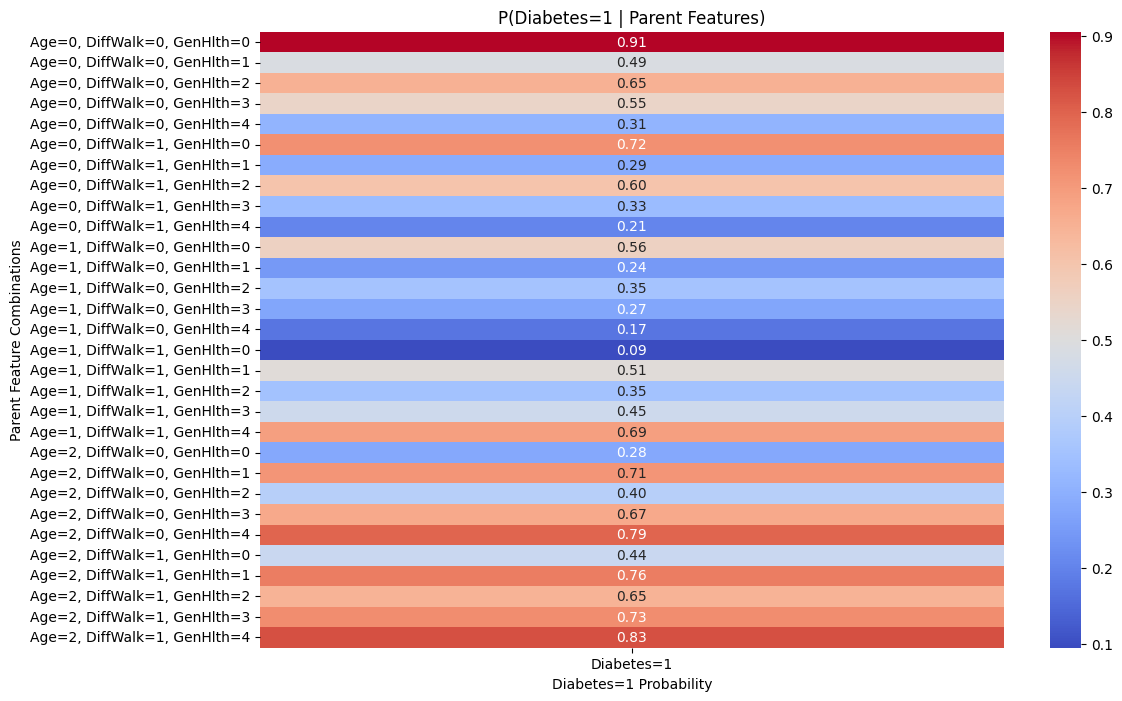

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cpd_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("P(Diabetes=1 | Parent Features)")
plt.xlabel("Diabetes=1 Probability")
plt.ylabel("Parent Feature Combinations")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# More advance

In [119]:
df_selected = pd.read_csv('df_selected.csv')

In [120]:
df = df_selected

In [121]:
df.columns

Index(['HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'Income', 'DiffWalk',
       'BMI', 'HeartDiseaseorAttack', 'Education', 'Diabetes_binary'],
      dtype='object')

## Use Simulated Annealing for Bayesian Network Learning

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore
import networkx as nx
import matplotlib.pyplot as plt
import random

hc = HillClimbSearch(df)

temperature = 1.0  # Start high
cooling_rate = 0.99  # Reduce over iterations
best_model_sa = None
best_score = float('-inf')

for i in range(100):
    print(f"Iteration {i+1}: Temperature = {temperature:.4f}")

    current_model = hc.estimate(scoring_method=BicScore(df))
    current_score = BicScore(df).score(current_model)

    # Accept or reject move based on Simulated Annealing logic
    if current_score > best_score or random.uniform(0, 1) < temperature:
        best_model_sa = current_model
        best_score = current_score

    # Reduce temperature (cooling)
    temperature *= cooling_rate

print("\nLearned Bayesian Network Structure (Edges):")
print(best_model_sa.edges())

Iteration 1: Temperature = 1.0000


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 2: Temperature = 0.9900


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 3: Temperature = 0.9801


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 4: Temperature = 0.9703


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 5: Temperature = 0.9606


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 6: Temperature = 0.9510


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 7: Temperature = 0.9415


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 8: Temperature = 0.9321


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 9: Temperature = 0.9227


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 10: Temperature = 0.9135


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 11: Temperature = 0.9044


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 12: Temperature = 0.8953


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 13: Temperature = 0.8864


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 14: Temperature = 0.8775


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 15: Temperature = 0.8687


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 16: Temperature = 0.8601


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 17: Temperature = 0.8515


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 18: Temperature = 0.8429


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 19: Temperature = 0.8345


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 20: Temperature = 0.8262


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 21: Temperature = 0.8179


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 22: Temperature = 0.8097


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 23: Temperature = 0.8016


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 24: Temperature = 0.7936


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 25: Temperature = 0.7857


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 26: Temperature = 0.7778


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 27: Temperature = 0.7700


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 28: Temperature = 0.7623


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 29: Temperature = 0.7547


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 30: Temperature = 0.7472


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 31: Temperature = 0.7397


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 32: Temperature = 0.7323


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 33: Temperature = 0.7250


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 34: Temperature = 0.7177


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 35: Temperature = 0.7106


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 36: Temperature = 0.7034


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 37: Temperature = 0.6964


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 38: Temperature = 0.6894


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 39: Temperature = 0.6826


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 40: Temperature = 0.6757


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 41: Temperature = 0.6690


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 42: Temperature = 0.6623


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 43: Temperature = 0.6557


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 44: Temperature = 0.6491


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 45: Temperature = 0.6426


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 46: Temperature = 0.6362


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 47: Temperature = 0.6298


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 48: Temperature = 0.6235


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 49: Temperature = 0.6173


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 50: Temperature = 0.6111


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 51: Temperature = 0.6050


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 52: Temperature = 0.5990


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 53: Temperature = 0.5930


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 54: Temperature = 0.5870


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 55: Temperature = 0.5812


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 56: Temperature = 0.5754


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 57: Temperature = 0.5696


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 58: Temperature = 0.5639


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 59: Temperature = 0.5583


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 60: Temperature = 0.5527


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 61: Temperature = 0.5472


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 62: Temperature = 0.5417


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 63: Temperature = 0.5363


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 64: Temperature = 0.5309


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 65: Temperature = 0.5256


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 66: Temperature = 0.5203


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 67: Temperature = 0.5151


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 68: Temperature = 0.5100


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 69: Temperature = 0.5049


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 70: Temperature = 0.4998


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 71: Temperature = 0.4948


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 72: Temperature = 0.4899


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 73: Temperature = 0.4850


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 74: Temperature = 0.4801


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 75: Temperature = 0.4753


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 76: Temperature = 0.4706


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 77: Temperature = 0.4659


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 78: Temperature = 0.4612


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 79: Temperature = 0.4566


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 80: Temperature = 0.4520


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 81: Temperature = 0.4475


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 82: Temperature = 0.4430


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 83: Temperature = 0.4386


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 84: Temperature = 0.4342


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 85: Temperature = 0.4299


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 86: Temperature = 0.4256


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 87: Temperature = 0.4213


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 88: Temperature = 0.4171


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 89: Temperature = 0.4129


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 90: Temperature = 0.4088


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 91: Temperature = 0.4047


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 92: Temperature = 0.4007


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 93: Temperature = 0.3967


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 94: Temperature = 0.3927


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 95: Temperature = 0.3888


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 96: Temperature = 0.3849


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 97: Temperature = 0.3810


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 98: Temperature = 0.3772


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 99: Temperature = 0.3735


  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration 100: Temperature = 0.3697


  0%|          | 0/1000000 [00:00<?, ?it/s]


Learned Bayesian Network Structure (Edges):
[('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'HighChol'), ('Age', 'BMI'), ('Age', 'HighBP'), ('Age', 'Diabetes_binary'), ('Income', 'Education'), ('Income', 'GenHlth'), ('Income', 'DiffWalk'), ('Income', 'Sex'), ('Income', 'Age'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'BMI'), ('DiffWalk', 'HighBP'), ('DiffWalk', 'Age'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'Education')]


### Save & Load Model

In [ ]:
import pickle

with open("best_model_sa_2.pkl", "wb") as file:
    pickle.dump(best_model_sa, file)

In [ ]:
import pickle

# Load the saved model
with open("best_model_sa_2.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Verify the loaded model
print("Loaded Model Structure:", loaded_model.edges())

Loaded Model Structure: [('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'HighChol'), ('Age', 'BMI'), ('Age', 'HighBP'), ('Age', 'Diabetes_binary'), ('Income', 'Education'), ('Income', 'GenHlth'), ('Income', 'DiffWalk'), ('Income', 'Sex'), ('Income', 'Age'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'BMI'), ('DiffWalk', 'HighBP'), ('DiffWalk', 'Age'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'Education')]


In [ ]:
best_model_sa = loaded_model

### Plot

In [ ]:
# @title Plot Configurations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(best_model_sa.edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

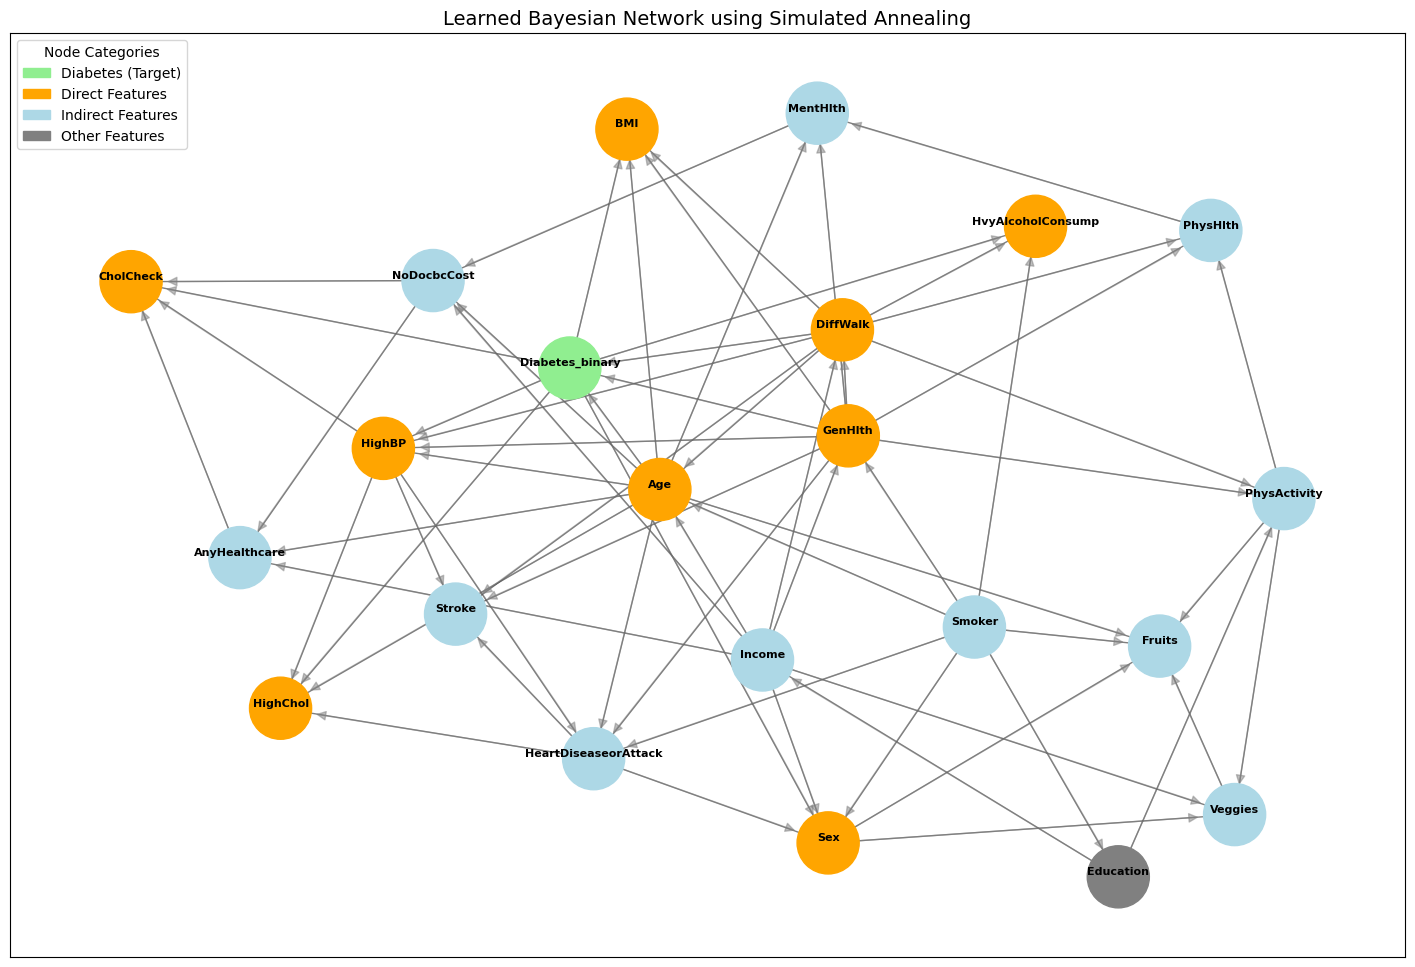

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Simulated Annealing", fontsize=14)

plt.show()

### Plot structure after feature selection

In [ ]:
# @title Plot Configurations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(best_model_sa.edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

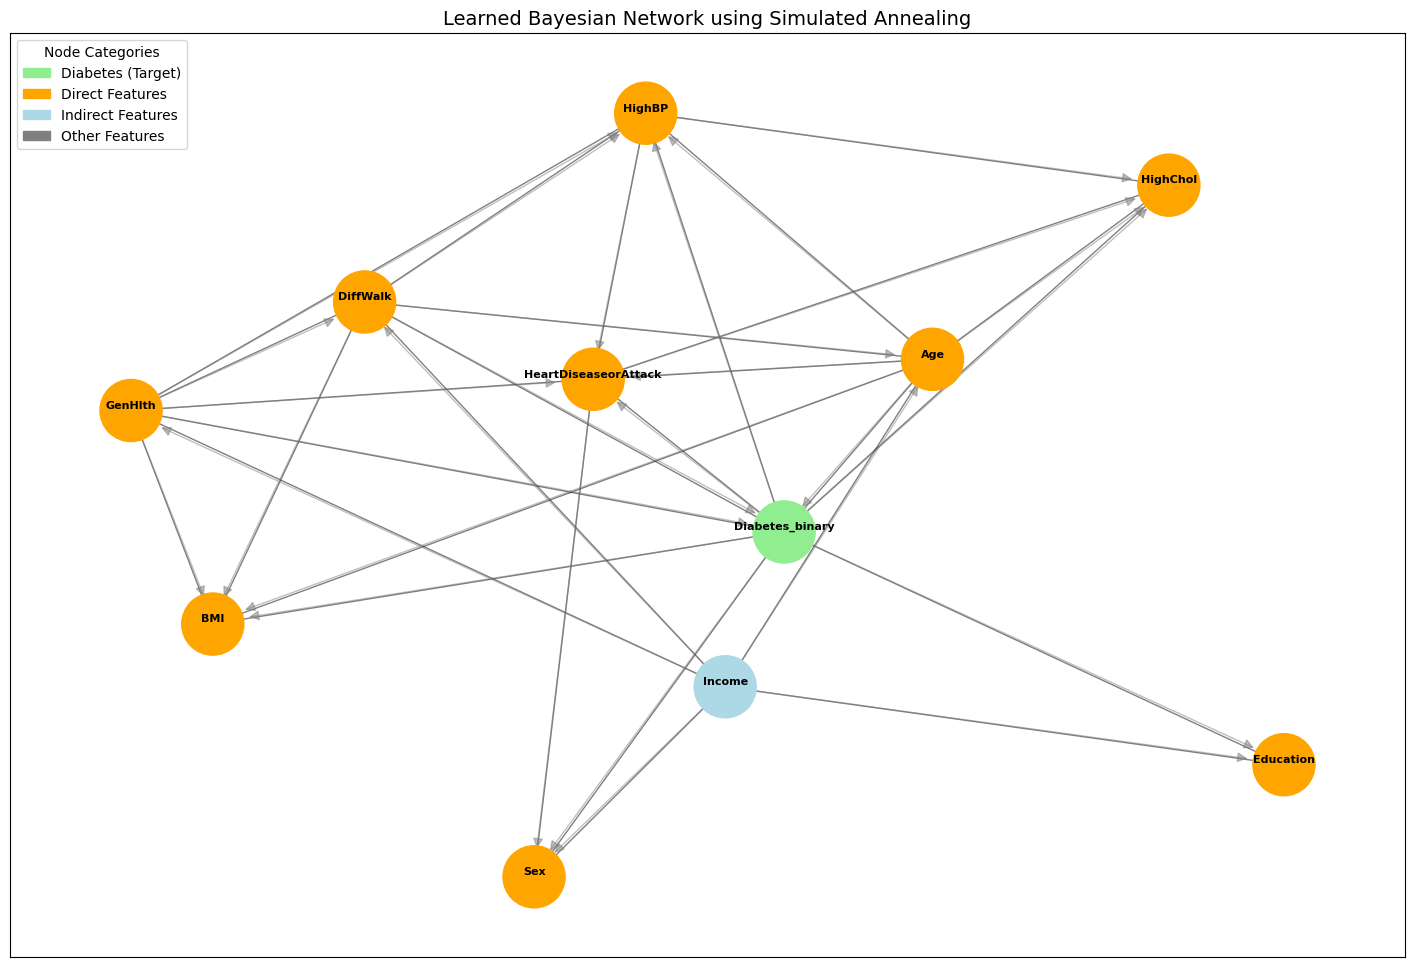

In [ ]:
# @title Plot found causal relations (Better View)
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 4.5, y_end - dy * 5.5),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Simulated Annealing", fontsize=14)

plt.show()

## Naïve Bayes Bayesian Network

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

naive_bayes_model = BayesianNetwork([("Diabetes_binary", feature) for feature in df.columns if feature != "Diabetes_binary"])

naive_bayes_model.fit(df, estimator=MaximumLikelihoodEstimator)

print("Naïve Bayes Structure:", naive_bayes_model.edges())

Naïve Bayes Structure: [('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'GenHlth'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'Income'), ('Diabetes_binary', 'DiffWalk'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'Education')]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# Identify categorical and continuous features
categorical_features = ["Sex", "Age", "Education", "Income", "Smoker", "PhysActivity", "HighBP", "HighChol"]
continuous_features = ["BMI", "MentHlth", "PhysHlth"]

# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for inverse transform if needed

# Standardize continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Define features & target
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GaussianNB for continuous data & CategoricalNB for categorical data
nb_continuous = GaussianNB()
nb_categorical = CategoricalNB()

# Fit models
nb_continuous.fit(X_train[continuous_features], y_train)
nb_categorical.fit(X_train[categorical_features], y_train)

# Predict
y_pred_continuous = nb_continuous.predict(X_test[continuous_features])
y_pred_categorical = nb_categorical.predict(X_test[categorical_features])

# Evaluate
acc_continuous = accuracy_score(y_test, y_pred_continuous)
auc_continuous = roc_auc_score(y_test, y_pred_continuous)
acc_categorical = accuracy_score(y_test, y_pred_categorical)
auc_categorical = roc_auc_score(y_test, y_pred_categorical)

print(f"GaussianNB - Accuracy: {acc_continuous:.4f}, AUC: {auc_continuous:.4f}")
print(f"CategoricalNB - Accuracy: {acc_categorical:.4f}, AUC: {auc_categorical:.4f}")


GaussianNB - Accuracy: 0.5889, AUC: 0.5923
CategoricalNB - Accuracy: 0.7067, AUC: 0.7065


### Plot

In [ ]:
# @title Plot Configurations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

# G = nx.DiGraph(naive_bayes_model.edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

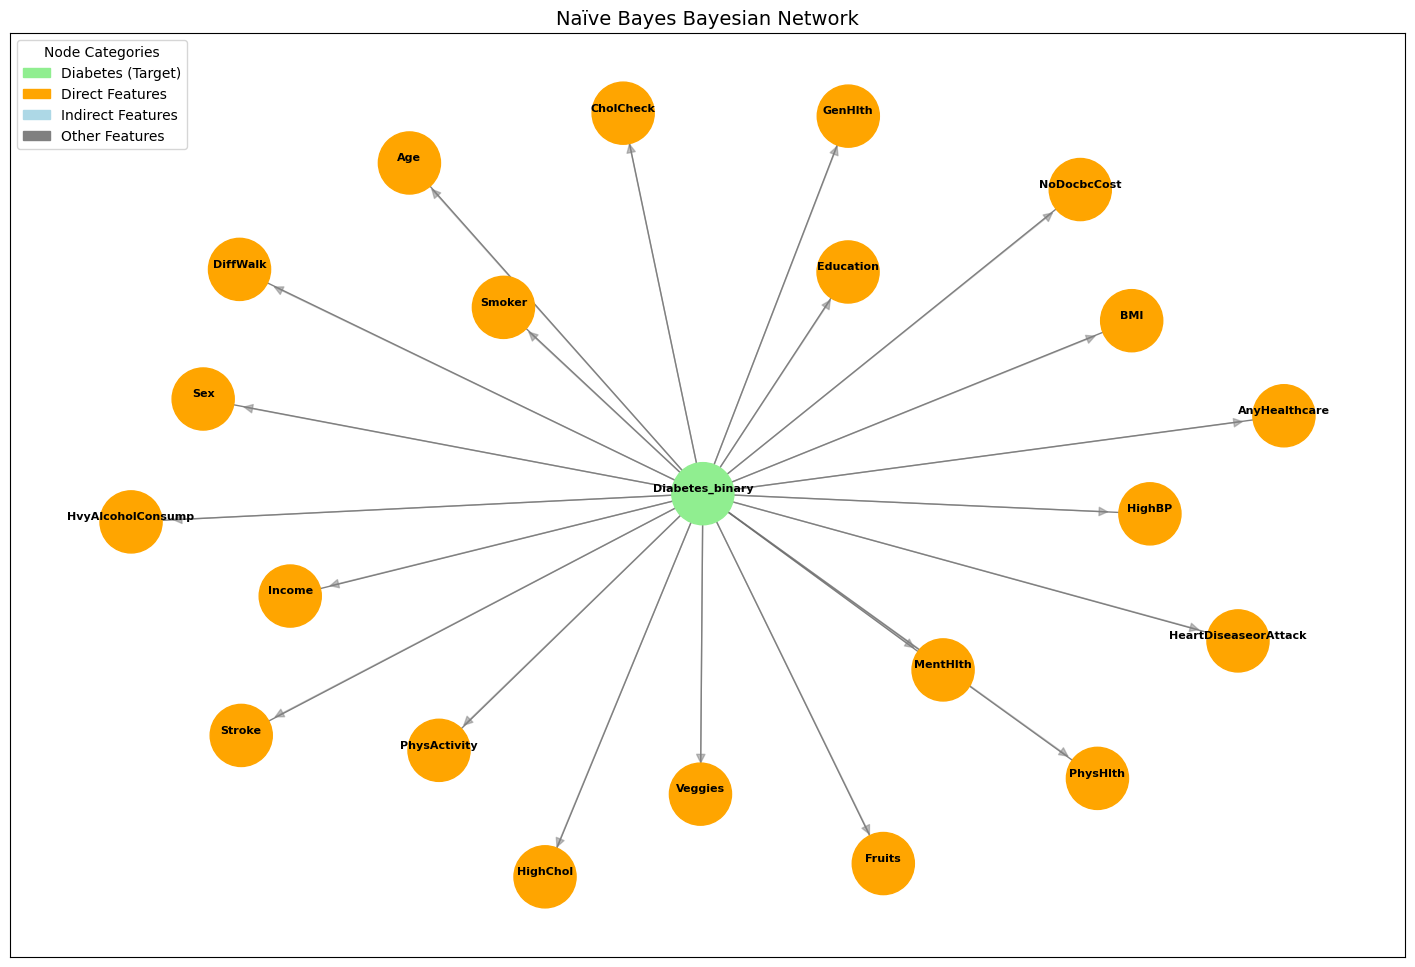

In [ ]:
# @title Plot
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Naïve Bayes Bayesian Network", fontsize=14)

plt.show()

#### Plot structure after feature selection

In [ ]:
# @title Plot Configurations
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(naive_bayes_model.edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

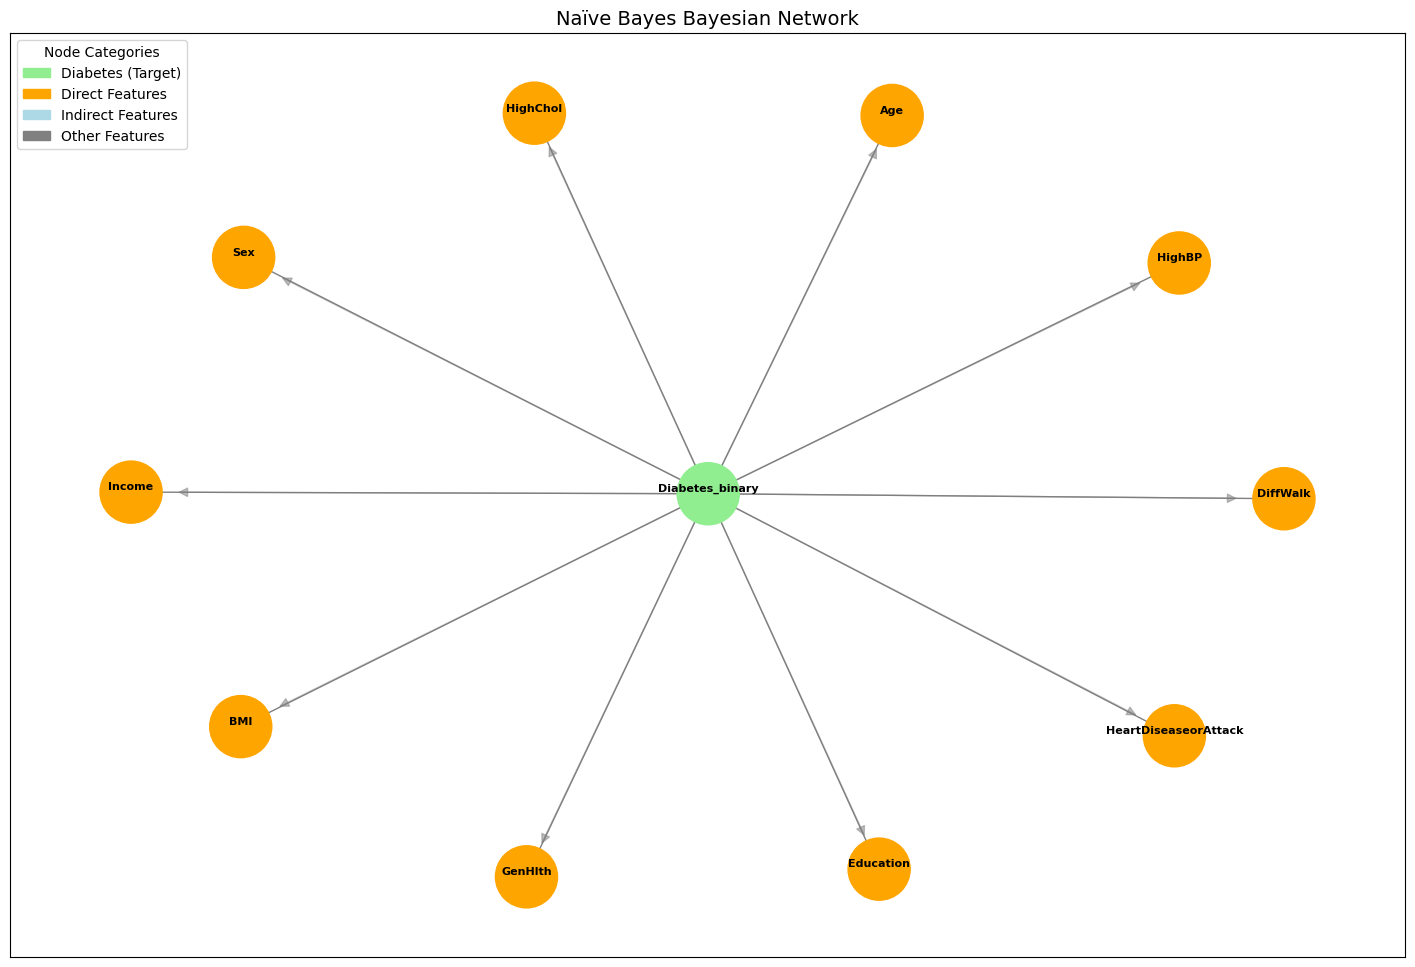

In [ ]:
# @title Plot
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Naïve Bayes Bayesian Network", fontsize=14)

plt.show()

## Hill Climbing with Different Scores

#### Before feature selection

In [113]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore

hc = HillClimbSearch(df)

scores = {"BIC": BicScore(df), "K2": K2Score(df), "BDeu": BDeuScore(df)}

models = {}
for name, score in scores.items():
    print(f"Estimating structure using {name} scoring method...")
    models[name] = hc.estimate(scoring_method=score)
    print(f"{name} Model Edges:", models[name].edges())

Estimating structure using BIC scoring method...


  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC Model Edges: [('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'Sex'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighBP', 'Stroke'), ('Smoker', 'Education'), ('Smoker', 'Sex'), ('Smoker', 'GenHlth'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'HeartDiseaseorAttack'), ('Smoker', 'Age'), ('Smoker', 'Fruits'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('PhysActivity', 'Veggies'), ('PhysActivity', 'Fruits'), ('PhysActivity', 'PhysHlth'), ('Veggies', 'Fruits'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('GenHlth', 'PhysHlth'), ('GenHlth', 'Hig

  0%|          | 0/1000000 [00:00<?, ?it/s]

K2 Model Edges: [('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('HighBP', 'HighChol'), ('HighBP', 'CholCheck'), ('HighChol', 'CholCheck'), ('BMI', 'Age'), ('BMI', 'Diabetes_binary'), ('BMI', 'HighBP'), ('BMI', 'Sex'), ('Smoker', 'HvyAlcoholConsump'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('HeartDiseaseorAttack', 'HighBP'), ('PhysActivity', 'Veggies'), ('PhysActivity', 'Fruits'), ('PhysActivity', 'Diabetes_binary'), ('PhysActivity', 'BMI'), ('Fruits', 'Sex'), ('Fruits', 'HvyAlcoholConsump'), ('Veggies', 'Fruits'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'MentHlth'), ('NoDocbcCost', 'Age'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'Diabetes_binary'), ('GenHlth',

  0%|          | 0/1000000 [00:00<?, ?it/s]

BDeu Model Edges: [('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'CholCheck'), ('Diabetes_binary', 'HvyAlcoholConsump'), ('Diabetes_binary', 'Sex'), ('HighBP', 'Age'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'CholCheck'), ('HighChol', 'HeartDiseaseorAttack'), ('HighChol', 'CholCheck'), ('BMI', 'Age'), ('BMI', 'Diabetes_binary'), ('Smoker', 'HvyAlcoholConsump'), ('Smoker', 'Fruits'), ('HeartDiseaseorAttack', 'Stroke'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'Smoker'), ('PhysActivity', 'Veggies'), ('PhysActivity', 'Fruits'), ('PhysActivity', 'PhysHlth'), ('Fruits', 'HvyAlcoholConsump'), ('Veggies', 'Fruits'), ('AnyHealthcare', 'CholCheck'), ('NoDocbcCost', 'AnyHealthcare'), ('NoDocbcCost', 'CholCheck'), ('GenHlth', 'PhysHlth'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'Income'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'MentHlth'), ('

#### After feature selection

In [122]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, BDeuScore

hc = HillClimbSearch(df)

scores = {"BIC": BicScore(df), "K2": K2Score(df), "BDeu": BDeuScore(df)}

models = {}
for name, score in scores.items():
    print(f"Estimating structure using {name} scoring method...")
    models[name] = hc.estimate(scoring_method=score)
    print(f"{name} Model Edges:", models[name].edges())

Estimating structure using BIC scoring method...


  0%|          | 0/1000000 [00:00<?, ?it/s]

BIC Model Edges: [('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'HighChol'), ('Age', 'BMI'), ('Age', 'HighBP'), ('Age', 'Diabetes_binary'), ('Income', 'DiffWalk'), ('Income', 'GenHlth'), ('Income', 'Sex'), ('Income', 'Age'), ('DiffWalk', 'GenHlth'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'BMI'), ('DiffWalk', 'HighBP'), ('DiffWalk', 'Age'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('Education', 'Income'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'BMI'), ('Diabetes_binary', 'HeartDiseaseorAttack')]
Estimating structure using K2 scoring method...


  0%|          | 0/1000000 [00:00<?, ?it/s]

K2 Model Edges: [('HighBP', 'HighChol'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'HighChol'), ('GenHlth', 'Income'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'HighChol'), ('Age', 'HighBP'), ('Age', 'Sex'), ('Income', 'DiffWalk'), ('Income', 'Age'), ('Income', 'Sex'), ('Income', 'Diabetes_binary'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'Age'), ('DiffWalk', 'BMI'), ('DiffWalk', 'HeartDiseaseorAttack'), ('DiffWalk', 'Sex'), ('BMI', 'Age'), ('BMI', 'HighBP'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('HeartDiseaseorAttack', 'HighBP'), ('Education', 'Income'), ('Education', 'GenHlth'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'BMI')]
Estimating structure using BDeu scoring method...


  0%|          | 0/1000000 [00:00<?, ?it/s]

BDeu Model Edges: [('HighBP', 'Age'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'Income'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('GenHlth', 'HighChol'), ('GenHlth', 'Education'), ('HighChol', 'HeartDiseaseorAttack'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'Income'), ('Age', 'HighChol'), ('Income', 'Education'), ('Income', 'Sex'), ('DiffWalk', 'GenHlth'), ('DiffWalk', 'Income'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'BMI'), ('DiffWalk', 'Age'), ('DiffWalk', 'HighBP'), ('DiffWalk', 'Sex'), ('BMI', 'Age'), ('BMI', 'Diabetes_binary'), ('HeartDiseaseorAttack', 'Sex'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'Sex')]


### Plot

In [ ]:
models

{'BIC': <pgmpy.base.DAG.DAG at 0x7b6d547b20d0>,
 'K2': <pgmpy.base.DAG.DAG at 0x7b6d54d642d0>,
 'BDeu': <pgmpy.base.DAG.DAG at 0x7b6d54e31c90>}

In [114]:
# @title Plot Configurations for BIC
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['BIC'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

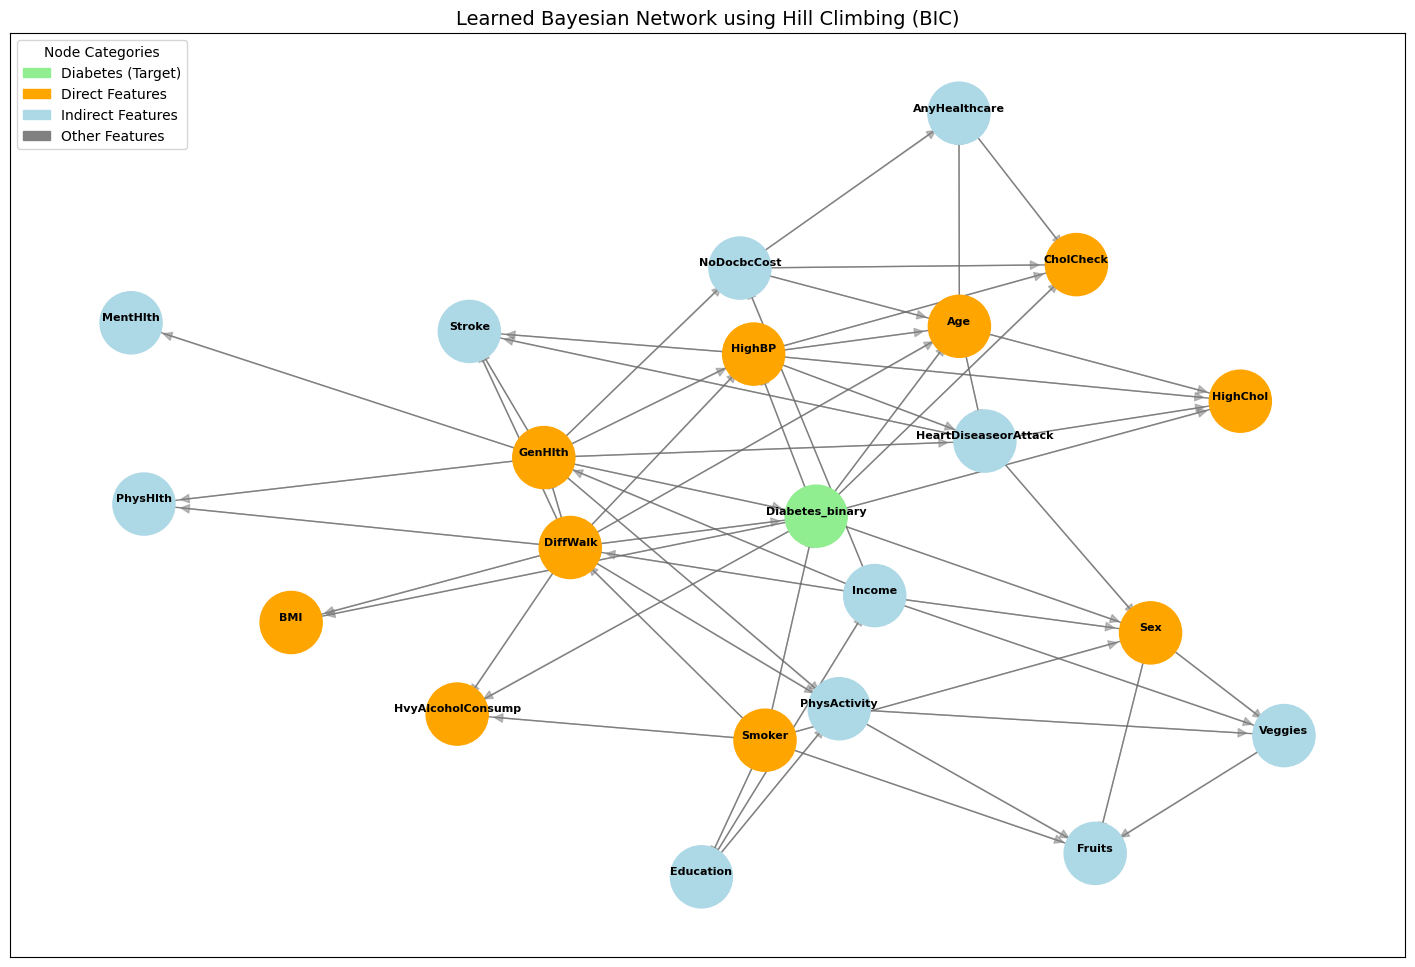

In [108]:
# @title Plot for BIC
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Hill Climbing (BIC)", fontsize=14)

plt.show()

In [117]:
# @title Plot Configurations for K2
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['K2'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

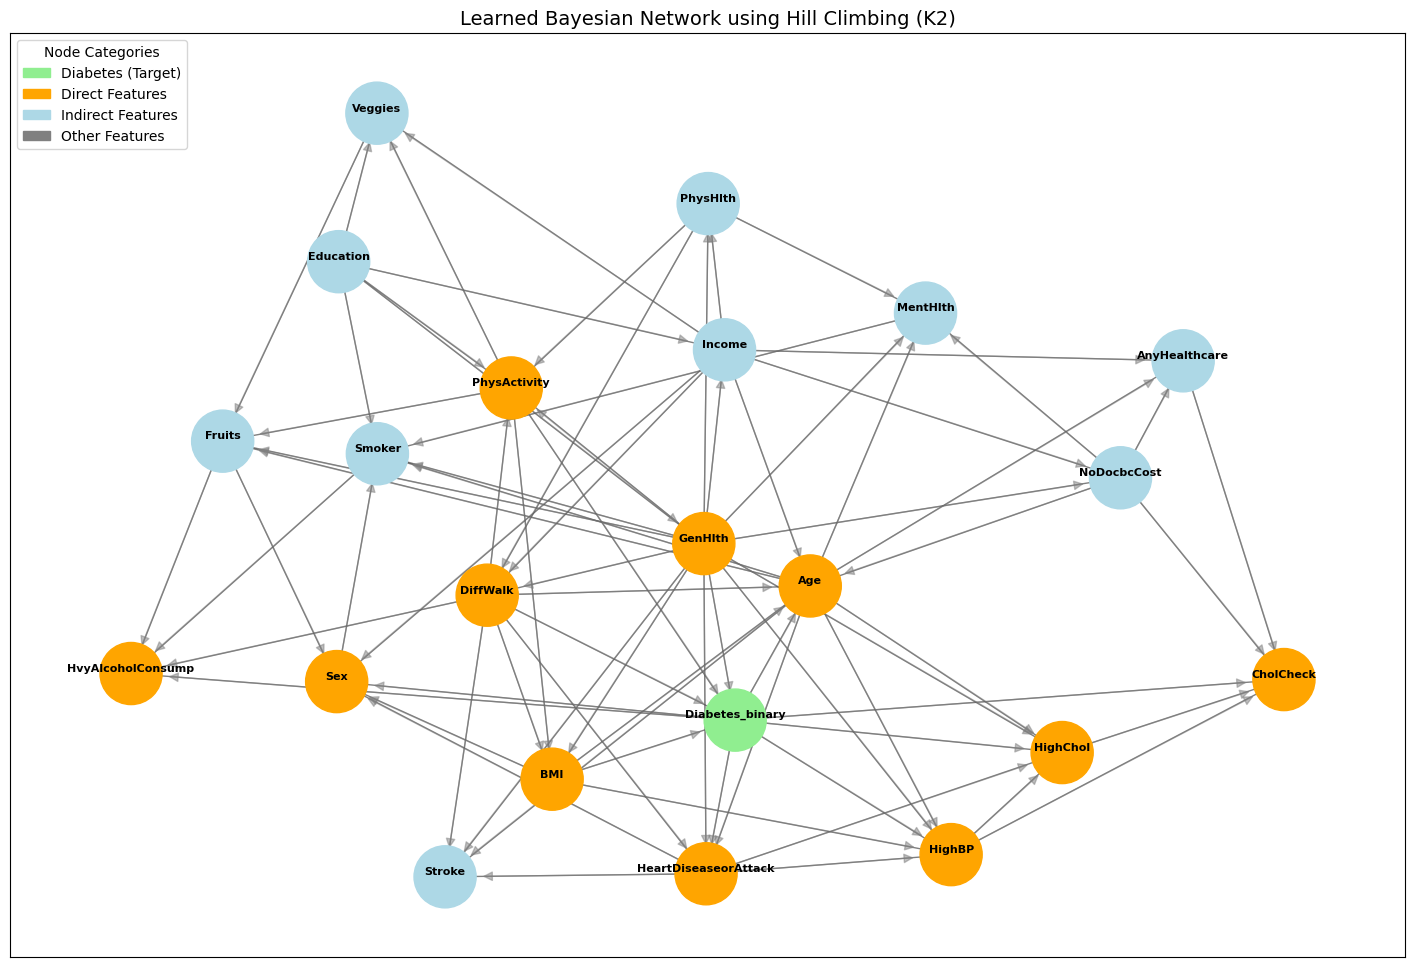

In [118]:
# @title Plot for K2
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Hill Climbing (K2)", fontsize=14)

plt.show()

In [ ]:
# @title Plot Configurations for BDeu
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['BDeu'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

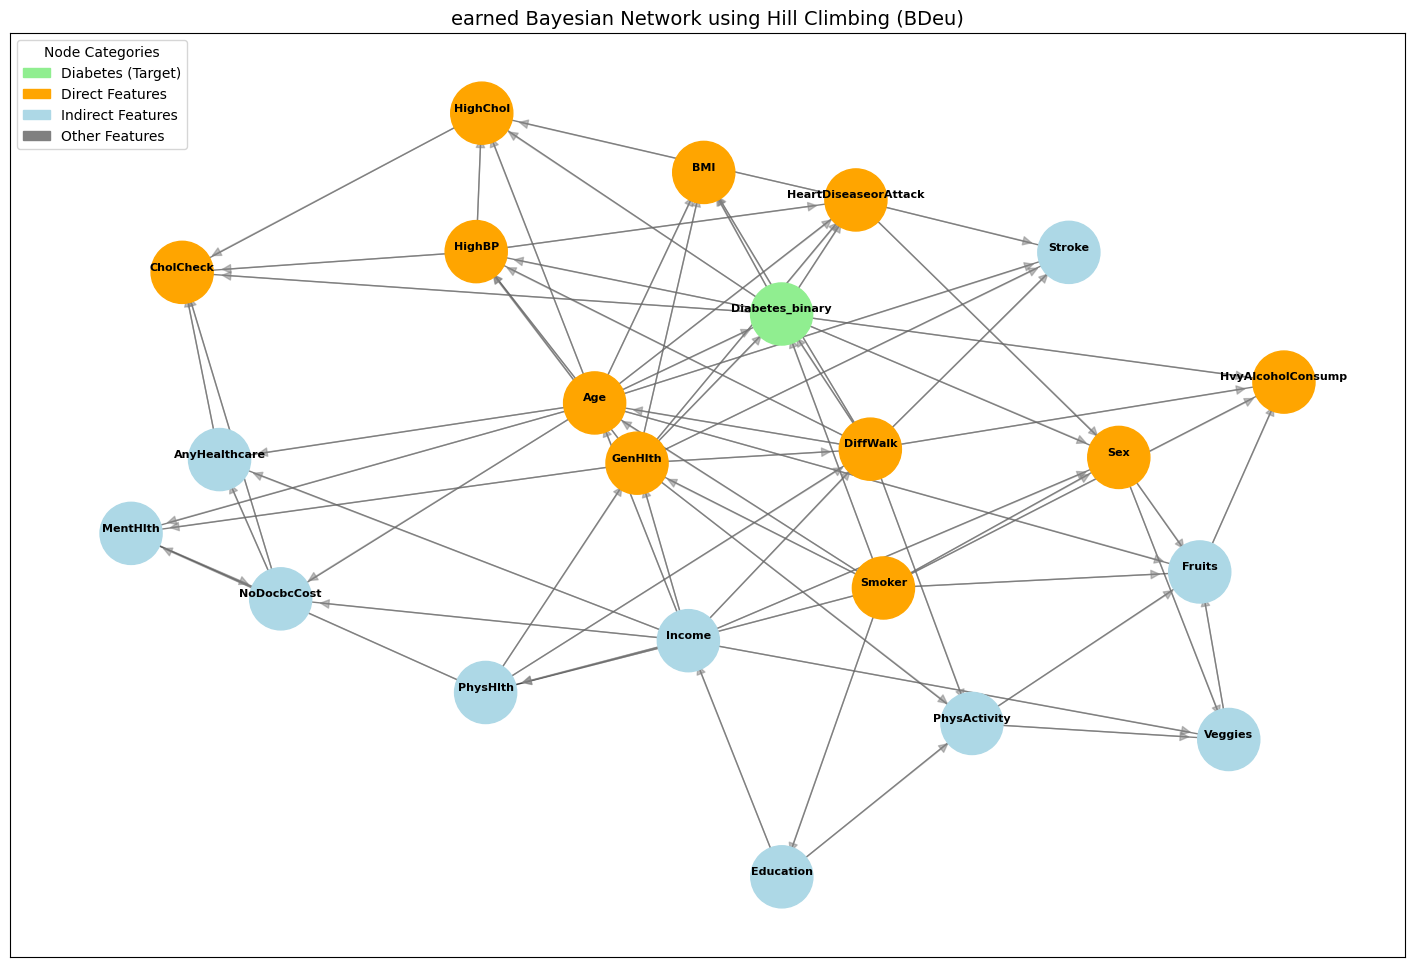

In [ ]:
# @title Plot for BDeu
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 6.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("earned Bayesian Network using Hill Climbing (BDeu)", fontsize=14)

plt.show()

#### Plot the structures after feature selection

In [ ]:
# @title Plot Configurations for BIC
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['BIC'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

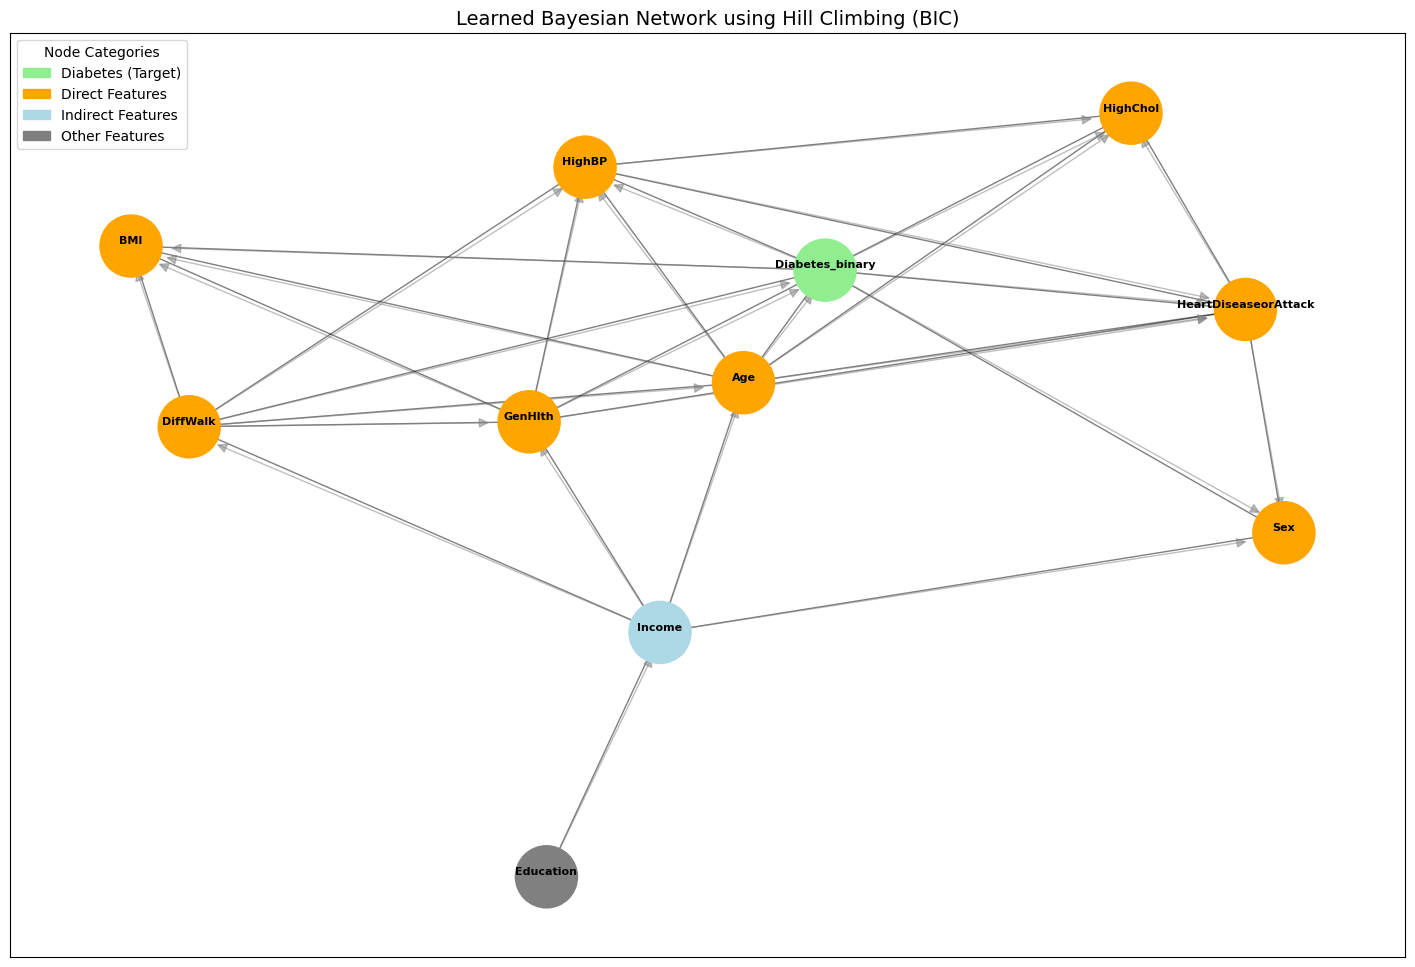

In [ ]:
# @title Plot for BIC
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))

pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 4.5, y_end - dy * 6.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Hill Climbing (BIC)", fontsize=14)

plt.show()

In [ ]:
# @title Plot Configurations for K2
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['K2'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

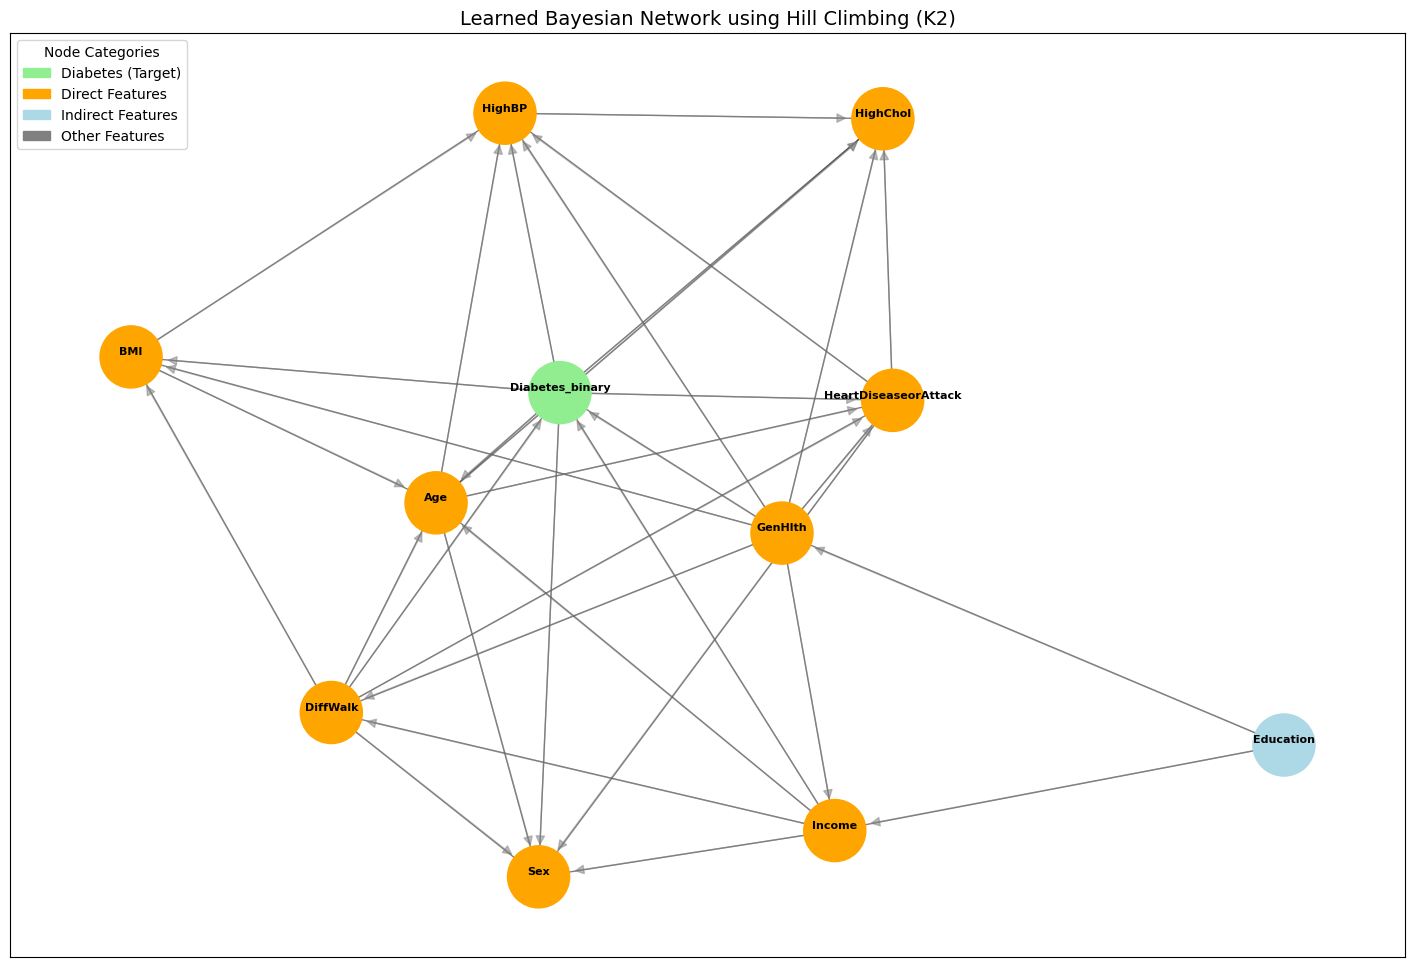

In [ ]:
# @title Plot for K2
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 5.0, y_end - dy * 5.3),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("Learned Bayesian Network using Hill Climbing (K2)", fontsize=14)

plt.show()

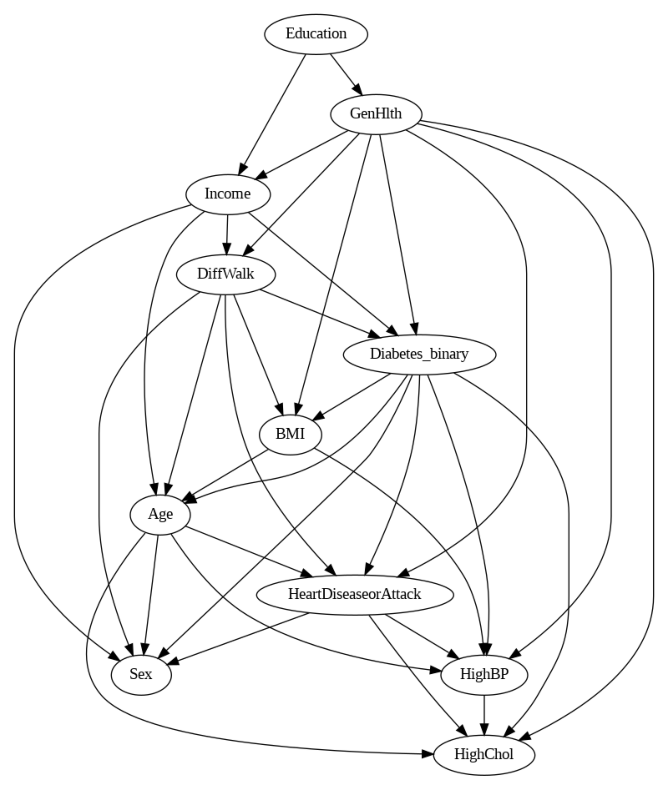

In [ ]:
# @title Plot for K2 aftere feature selection (better view)
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph

# Convert NetworkX graph to PyGraphviz AGraph (forces proper arrow rendering)
A = to_agraph(G)

# Use "fdp" layout for better spacing (or "dot" for tree-like structure)
A.layout(prog="dot")

A.draw("bayesian_network_k2.png")

plt.figure(figsize=(10, 10))
img = plt.imread("bayesian_network_k2.png")
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# @title Plot Configurations for BDeu
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

target_node = "Diabetes_binary"

G = nx.DiGraph(models['BDeu'].edges())

# Find direct connections (1st level)
first_level_nodes = set(nx.all_neighbors(G, target_node))

# Find second-level connections (indirect)
second_level_nodes = set()
for node in first_level_nodes:
    second_level_nodes.update(nx.all_neighbors(G, node))

# Remove first-level nodes from second-level set
second_level_nodes -= first_level_nodes
second_level_nodes.discard(target_node)

node_colors = {}
for node in G.nodes:
    if node == target_node:
        node_colors[node] = "lightgreen"
    elif node in first_level_nodes:
        node_colors[node] = "orange"
    elif node in second_level_nodes:
        node_colors[node] = "lightblue"
    else:
        node_colors[node] = "gray"

# Define Graphviz layout
pos = graphviz_layout(G, prog="dot")

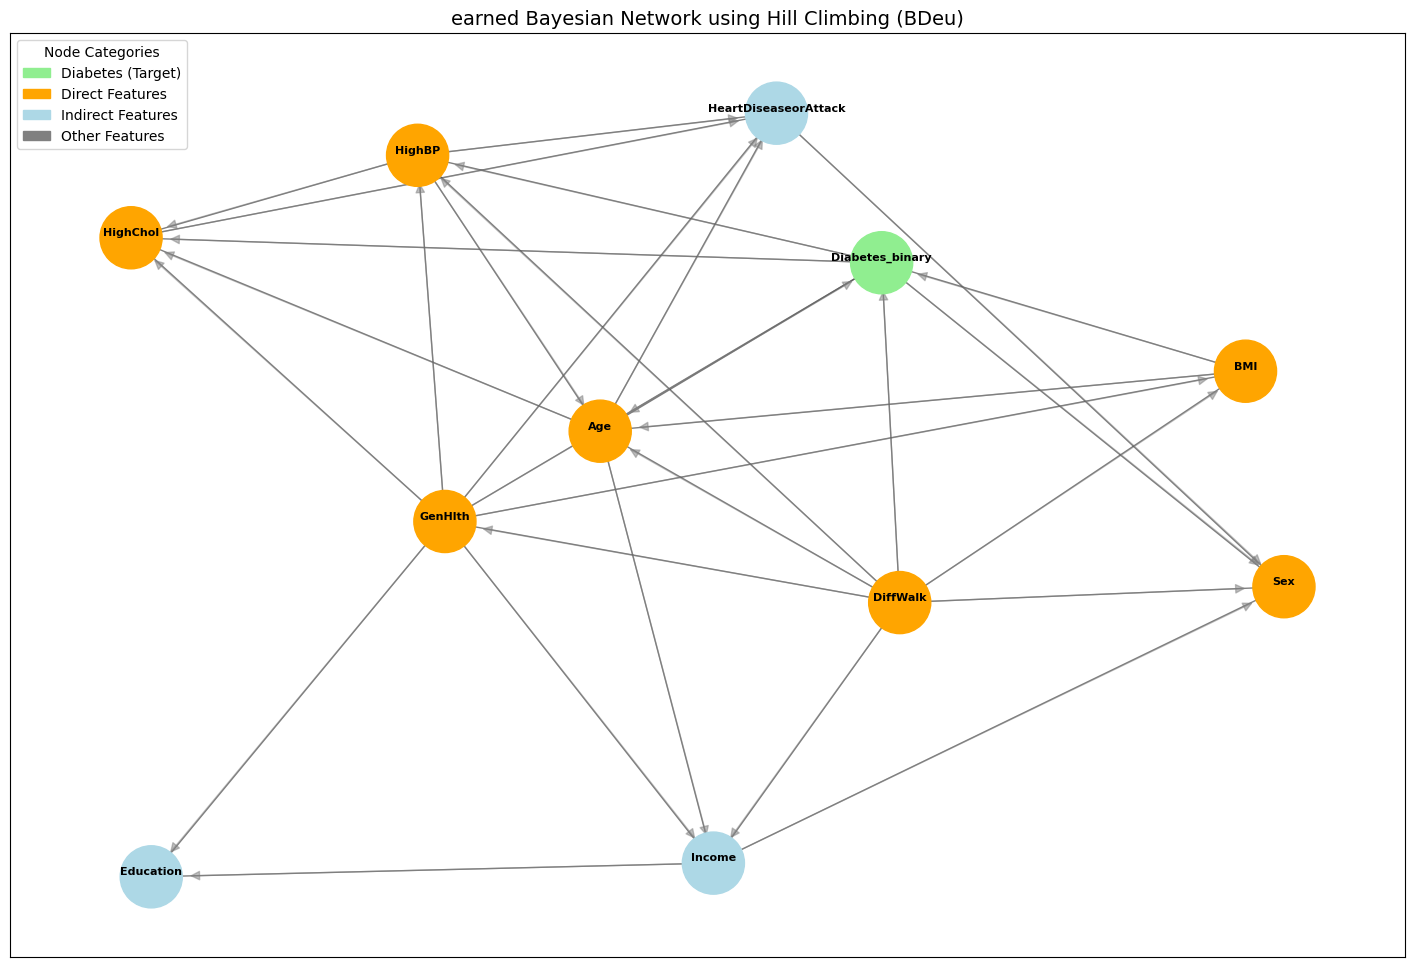

In [ ]:
# @title Plot for BDeu
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch

plt.figure(figsize=(18, 12))
pos = graphviz_layout(G, prog="neato")

node_artists = nx.draw_networkx_nodes(
    G, pos,
    node_color=[node_colors[n] for n in G.nodes()],
    node_size=2000
)

edges = nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=False)

for u, v, data in G.edges(data=True):
    x_start, y_start = pos[u]
    x_end, y_end = pos[v]

    dx = x_end - x_start
    dy = y_end - y_start
    length = (dx**2 + dy**2)**0.5

    dx /= length
    dy /= length

    arrow = FancyArrowPatch(
        (x_start + dx * 0.1, y_start + dy * 0.1),  # Start closer to the edge of node u
        (x_end - dx * 4.5, y_end - dy * 4.8),    # End closer to the edge of node v
        arrowstyle='-|>',
        mutation_scale=15,
        color='gray',
        lw=1,
        alpha=0.5,  # Transparency
    )
    plt.gca().add_patch(arrow)

nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", verticalalignment="bottom")

import matplotlib.patches as mpatches
legend_labels = {
    "Diabetes (Target)": "lightgreen",
    "Direct Features": "orange",
    "Indirect Features": "lightblue",
    "Other Features": "gray"
}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_patches, loc="upper left", fontsize=10, title="Node Categories")

plt.title("earned Bayesian Network using Hill Climbing (BDeu)", fontsize=14)

plt.show()

## Data Sampling

In [ ]:
from sklearn.model_selection import train_test_split

df_sampled, _ = train_test_split(df, train_size=7000, stratify=df["Diabetes_binary"], random_state=42)

print(f"✅ Sampled Data Shape: {df_sampled.shape}")

✅ Sampled Data Shape: (7000, 11)


In [ ]:
print("df info:")
print(df.info())

print("\ndf_sampled info:")
print(df_sampled.info())

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   GenHlth               70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   Age                   70692 non-null  int64  
 4   Sex                   70692 non-null  int64  
 5   Income                70692 non-null  int64  
 6   DiffWalk              70692 non-null  float64
 7   BMI                   70692 non-null  float64
 8   HeartDiseaseorAttack  70692 non-null  float64
 9   Education             70692 non-null  int64  
 10  Diabetes_binary       70692 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 5.9 MB
None

df_sampled info:
<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 57924 to 473
Data columns (total 11 columns):
 #   Column                Non-Null Count

## Evaluate Models (Without Feature Selection) and Find the Best

In [ ]:
models["Naïve Bayes"] = naive_bayes_model
models["Simulated Annealing"] = best_model_sa

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck BMI  Smoker  Stroke  \
0              1.0     0.0       1.0        1.0   0     1.0     0.0   
1              0.0     0.0       0.0        1.0   0     1.0     0.0   
2              0.0     1.0       1.0        1.0   0     1.0     0.0   
3              0.0     0.0       1.0        1.0   0     1.0     0.0   
4              1.0     1.0       0.0        1.0   1     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           0.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth DiffWalk  Sex  Age  Education  \
0          0.0      4.0         0         0      0.0  0.0    2        4.0   
1          0.0      3.0         0         0      1.0  0.0    2        5.0   
2          0.0      2.0         0         0      0.0  1.0    1        6.0   
3          0.0      3.0         0         0      0.0  1.0    1        5.0   
4          0.0      4.0         1         0      1.0  1.0    1        6.0   

  Income  
0    5.0  
1    4.0  
2    6.0  
3    8.0  
4    3.0  

[5 rows x 22 columns]

In [ ]:
df_sampled.head()

NoDocbcCost  Diabetes_binary  HighBP  Sex PhysHlth  Stroke  Education  \
57482          0.0              1.0     1.0  1.0        0     0.0        3.0   
23411          0.0              1.0     1.0  1.0        0     0.0        5.0   
69436          0.0              0.0     1.0  0.0        1     0.0        4.0   
51229          0.0              1.0     0.0  1.0        0     0.0        6.0   
60037          0.0              1.0     0.0  1.0        0     0.0        4.0   

       HeartDiseaseorAttack  HighChol MentHlth Age  CholCheck  \
57482                   0.0       1.0        0   2        1.0   
23411                   0.0       1.0        0   2        1.0   
69436                   1.0       1.0        0   2        1.0   
51229                   0.0       0.0        0   0        1.0   
60037                   0.0       0.0        0   2        1.0   

       HvyAlcoholConsump  DiffWalk  Smoker  Diabetes_binary  
57482                0.0       0.0     1.0              1.0  
23411                0.0       1.0     1.0              1.0  
69436                0.0       1.0     0.0              0.0  
51229                0.0       0.0     0.0              1.0  
60037                0.0       0.0     0.0              1.0

In [ ]:
df_sampled = df_sampled.loc[:, ~df_sampled.columns.duplicated()]

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ExpectationMaximization
from pgmpy.inference import VariableElimination
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df_sampled):
    """
    Preprocess DataFrame with proper handling of both categorical and float columns
    """
    df_copy = df_sampled.copy()

    for col in df_copy.columns:
        try:
            if df_copy[col].dtype.name == 'category':
                # For categorical columns, just get their codes directly
                df_copy[col] = df_copy[col].cat.codes
            elif df_copy[col].dtype == 'float64':
                # For float columns, convert to int
                df_copy[col] = df_copy[col].astype(int)

            print(f"Successfully processed column: {col} (unique values: {len(df_copy[col].unique())})")

        except Exception as e:
            print(f"Error processing column '{col}': {e}")
            return None

    print("\nProcessed DataFrame info:")
    print(df_copy.info())
    return df_copy

def convert_to_bayesian_network(dag, df_sampled):
    """
    Convert a DAG to a Bayesian Network and learn CPDs using EM
    """
    print("Starting preprocessing...")
    df_processed = preprocess_data(df_sampled)

    if df_processed is None:
        raise ValueError("Preprocessing failed")

    print("\nSample of processed data:")
    print(df_processed.head())

    print("\nCreating Bayesian Network...")
    bn_model = BayesianNetwork(dag.edges())

    try:
        print("Fitting model with EM...")
        bn_model.fit(
            df_processed,
            estimator=ExpectationMaximization,
        )
        print("Model fitting complete!")

        if bn_model.check_model():
            print("✅ Model structure is valid.")
        else:
            print("⚠️ Model structure is invalid.")

    except Exception as e:
        print("Error during fitting with EM:", str(e))
        raise e

    return bn_model

def evaluate_model(model, df_sampled):
    """
    Compute ROC AUC for a single model
    """
    df_processed = preprocess_data(df_sampled)
    if df_processed is None:
        raise ValueError("Preprocessing failed during evaluation")

    inference = VariableElimination(model)
    y_true = df_processed["Diabetes_binary"]

    y_pred = []
    for _, row in df_processed.iterrows():
        evidence = row.drop("Diabetes_binary").to_dict()
        try:
            result = inference.map_query(
                variables=["Diabetes_binary"],
                evidence=evidence
            )
            pred = result["Diabetes_binary"]
            y_pred.append(pred)
        except Exception as e:
            print(f"Inference error: {e}")
            y_pred.append(0)

    return roc_auc_score(y_true, y_pred)

def evaluate_all_models(models, df_sampled):
    """
    Evaluate all models and return their AUC scores
    """
    print("\nStarting model evaluation...")
    auc_scores = {}

    for name, dag in models.items():
        try:
            print(f"\n🔄 Converting {name} to Bayesian Network...")
            bn_model = convert_to_bayesian_network(dag, df_sampled)
            print(f"✅ {name} converted successfully!")

            print(f"🔍 Evaluating {name}...")
            auc = evaluate_model(bn_model, df_sampled)
            auc_scores[name] = auc
            print(f"🎯 {name} AUC Score: {auc:.4f}")

        except Exception as e:
            print(f"❌ Error processing {name}: {str(e)}")

    if auc_scores:
        best_model_name = max(auc_scores, key=auc_scores.get)
        print(f"\n🏆 Best Model: {best_model_name} with AUC = {auc_scores[best_model_name]:.4f}")
    else:
        print("\n⚠️ No models were successfully evaluated.")

    return auc_scores

if __name__ == "__main__":
    print("DataFrame information before processing:")
    print(df_sampled.info())

    results = evaluate_all_models(models, df_sampled)

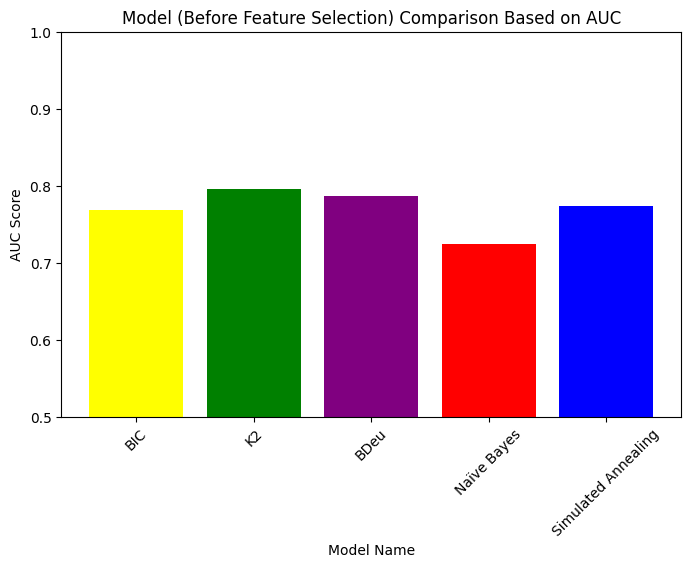

In [ ]:
import matplotlib.pyplot as plt

# Plot AUC Scores
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['yellow', 'green', 'purple', 'red', 'blue'])
plt.xlabel("Model Name")
plt.ylabel("AUC Score")
plt.title("Model (Before Feature Selection) Comparison Based on AUC")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)  # AUC range
plt.show()

## Evaluate Models (After Feature Selection) and Find the Best

In [ ]:
models["Naïve Bayes"] = naive_bayes_model
models["Simulated Annealing"] = best_model_sa

In [ ]:
df_sampled = df_sampled.loc[:, ~df_sampled.columns.duplicated()]

In [ ]:
df_sampled.columns

Index(['HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'Income', 'DiffWalk',
       'BMI', 'HeartDiseaseorAttack', 'Education', 'Diabetes_binary'],
      dtype='object')

In [ ]:
models['BIC'].nodes()

NodeView(('HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'Income', 'DiffWalk', 'BMI', 'HeartDiseaseorAttack', 'Education', 'Diabetes_binary'))

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_sampled, test_size=0.2, random_state=42)

print(f"Training Set Size: {len(df_train)}")
print(f"Testing Set Size: {len(df_test)}")

Training Set Size: 5600
Testing Set Size: 1400


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ExpectationMaximization
from pgmpy.inference import VariableElimination
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df_sampled):
    """
    Preprocess DataFrame with proper handling of both categorical and float columns
    """
    df_copy = df_sampled.copy()

    for col in df_copy.columns:
        try:
            if df_copy[col].dtype.name == 'category':
                # For categorical columns, just get their codes directly
                df_copy[col] = df_copy[col].cat.codes
            elif df_copy[col].dtype == 'float64':
                # For float columns, convert to int
                df_copy[col] = df_copy[col].astype(int)

            print(f"Successfully processed column: {col} (unique values: {len(df_copy[col].unique())})")

        except Exception as e:
            print(f"Error processing column '{col}': {e}")
            return None

    print("\nProcessed DataFrame info:")
    print(df_copy.info())
    return df_copy

def convert_to_bayesian_network(dag, df_sampled):
    """
    Convert a DAG to a Bayesian Network and learn CPDs using EM
    """
    print("Starting preprocessing...")
    df_processed = preprocess_data(df_sampled)

    if df_processed is None:
        raise ValueError("Preprocessing failed")

    print("\nSample of processed data:")
    print(df_processed.head())

    print("\nCreating Bayesian Network...")
    bn_model = BayesianNetwork(dag.edges())

    try:
        print("Fitting model with MLE...")
        bn_model.fit(
        df_processed, estimator=MaximumLikelihoodEstimator, state_names=True
        )
        print("Model fitting complete!")

        if bn_model.check_model():
            print("✅ Model structure is valid.")
        else:
            print("⚠️ Model structure is invalid.")

    except Exception as e:
        print("Error during fitting with EM:", str(e))
        raise e

    for cpd in bn_model.get_cpds():
        print(f"🔍 Checking {cpd.variable}: Sum = {cpd.values.sum()}")

    return bn_model

def evaluate_model(model, df_sampled):
    """
    Compute ROC AUC for a single model
    """
    df_processed = preprocess_data(df_sampled)
    if df_processed is None:
        raise ValueError("Preprocessing failed during evaluation")

    inference = VariableElimination(model)
    y_true = df_processed["Diabetes_binary"]

    y_pred = []
    for _, row in df_processed.iterrows():
        evidence = row.drop("Diabetes_binary").to_dict()
        try:
            result = inference.map_query(
                variables=["Diabetes_binary"],
                evidence=evidence
            )
            pred = result["Diabetes_binary"]
            y_pred.append(pred)
        except Exception as e:
            print(f"Inference error: {e}")
            y_pred.append(0)

    return roc_auc_score(y_true, y_pred)

def evaluate_all_models(models, df_train, df_test):

    print("\n🚀 Starting model training and evaluation...")

    auc_scores = {}

    for name, dag in models.items():
        try:
            print(f"\n🔄 Training {name} on TRAIN set...")
            bn_model = convert_to_bayesian_network(dag, df_train)
            print(f"✅ {name} trained successfully!")

            print(f"🔍 Evaluating {name} on TEST set...")
            auc = evaluate_model(bn_model, df_test)
            auc_scores[name] = auc
            print(f"🎯 {name} AUC Score (Test Set): {auc:.4f}")

        except Exception as e:
            print(f"❌ Error processing {name}: {str(e)}")

    if auc_scores:
        best_model_name = max(auc_scores, key=auc_scores.get)
        print(f"\n🏆 Best Model: {best_model_name} with AUC = {auc_scores[best_model_name]:.4f}")
    else:
        print("\n⚠️ No models were successfully evaluated.")

    return auc_scores

if __name__ == "__main__":
    print("DataFrame information before processing:")
    print(df_sampled.info())

    results = evaluate_all_models(models, df_train, df_test)

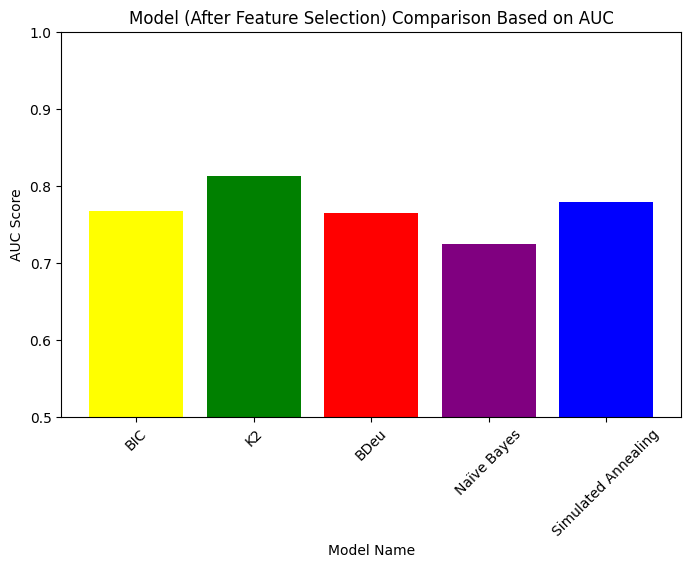

In [ ]:
import matplotlib.pyplot as plt

# Plot AUC Scores
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['yellow', 'green', 'red', 'purple', 'blue'])
plt.xlabel("Model Name")
plt.ylabel("AUC Score")
plt.title("Model (After Feature Selection) Comparison Based on AUC")
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)  # AUC range
plt.show()

## Parameter Learning for the Best Model

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

bn_k2 = BayesianNetwork(models['K2'].edges())

df_processed = preprocess_data(df)

print("⚙️ Learning parameters using MLE for K2...")
bn_k2.fit(df_processed, estimator=MaximumLikelihoodEstimator)
print("✅ Parameter learning complete!")

# Print learned CPDs (Conditional Probability Distributions)
for cpd in bn_k2.get_cpds():
    print(f"\nCPD for {cpd.variable}:")
    print(cpd)


Successfully processed column: HighBP (unique values: 2)
Successfully processed column: GenHlth (unique values: 5)
Successfully processed column: HighChol (unique values: 2)
Successfully processed column: Age (unique values: 3)
Successfully processed column: Sex (unique values: 2)
Successfully processed column: Income (unique values: 8)
Successfully processed column: DiffWalk (unique values: 2)
Successfully processed column: BMI (unique values: 3)
Successfully processed column: HeartDiseaseorAttack (unique values: 2)
Successfully processed column: Education (unique values: 6)
Successfully processed column: Diabetes_binary (unique values: 2)

Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                70692 non-null  int64
 1   GenHlth               70692 non-null  int64
 2   HighChol      

In [ ]:
best_model = bn_k2

In [ ]:
# @markdown Save Best Model
import pickle

with open("best_model_as.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Model saved as best_model_as.pkl")


✅ Model saved as best_model_as.pkl


In [ ]:
# @markdown Dave Best Model to Drive
import pickle

save_path = "/content/drive/My Drive/best_model_as.pkl"

with open(save_path, "wb") as f:
    pickle.dump(bn_k2, f)
print(f"✅ Model saved to Google Drive at: {save_path}")

✅ Model saved to Google Drive at: /content/drive/My Drive/bn_k2_model_as.pkl


In [ ]:
# @markdown Load Best Model
import pickle

with open("best_model_as.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [ ]:
loaded_model.edges()

OutEdgeView([('HighBP', 'HighChol'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'HeartDiseaseorAttack'), ('GenHlth', 'HighBP'), ('GenHlth', 'BMI'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'HighChol'), ('GenHlth', 'Income'), ('Diabetes_binary', 'HighBP'), ('Diabetes_binary', 'HighChol'), ('Diabetes_binary', 'Age'), ('Diabetes_binary', 'Sex'), ('Diabetes_binary', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'BMI'), ('HeartDiseaseorAttack', 'Sex'), ('HeartDiseaseorAttack', 'HighChol'), ('HeartDiseaseorAttack', 'HighBP'), ('BMI', 'Age'), ('BMI', 'HighBP'), ('DiffWalk', 'Diabetes_binary'), ('DiffWalk', 'Age'), ('DiffWalk', 'BMI'), ('DiffWalk', 'HeartDiseaseorAttack'), ('DiffWalk', 'Sex'), ('Income', 'DiffWalk'), ('Income', 'Age'), ('Income', 'Sex'), ('Income', 'Diabetes_binary'), ('Age', 'HeartDiseaseorAttack'), ('Age', 'HighChol'), ('Age', 'HighBP'), ('Age', 'Sex'), ('Education', 'Income'), ('Education', 'GenHlth')])

In [ ]:
loaded_model.get_cpds()  # Print conditional probability distributions (CPDs)

[<TabularCPD representing P(HighBP:2 | Age:3, BMI:3, Diabetes_binary:2, GenHlth:5, HeartDiseaseorAttack:2) at 0x7be09cb96410>,
 <TabularCPD representing P(HighChol:2 | Age:3, Diabetes_binary:2, GenHlth:5, HeartDiseaseorAttack:2, HighBP:2) at 0x7be09c4b8090>,
 <TabularCPD representing P(GenHlth:5 | Education:6) at 0x7be09c4b8610>,
 <TabularCPD representing P(Diabetes_binary:2 | DiffWalk:2, GenHlth:5, Income:8) at 0x7be09c4b8950>,
 <TabularCPD representing P(HeartDiseaseorAttack:2 | Age:3, Diabetes_binary:2, DiffWalk:2, GenHlth:5) at 0x7be09c4b8dd0>,
 <TabularCPD representing P(BMI:3 | Diabetes_binary:2, DiffWalk:2, GenHlth:5) at 0x7be09c4b9210>,
 <TabularCPD representing P(DiffWalk:2 | GenHlth:5, Income:8) at 0x7be09c4b9310>,
 <TabularCPD representing P(Income:8 | Education:6, GenHlth:5) at 0x7be09c4b9950>,
 <TabularCPD representing P(Age:3 | BMI:3, Diabetes_binary:2, DiffWalk:2, Income:8) at 0x7be09c4b9d90>,
 <TabularCPD representing P(Sex:2 | Age:3, Diabetes_binary:2, DiffWalk:2, Hear

In [ ]:
loaded_model.check_model()

True

In [ ]:
df_selected.columns

Index(['HighBP', 'GenHlth', 'HighChol', 'Age', 'Sex', 'Income', 'DiffWalk',
       'BMI', 'HeartDiseaseorAttack', 'Education', 'Diabetes_binary'],
      dtype='object')

In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(loaded_model)

evidence = {"HighBP": 1, "BMI": 0, "GenHlth": 5, "Age": 2, "Sex": 0, "Income": 5}

result = inference.query(variables=["Diabetes_binary"], evidence=evidence)
print(result)

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.2066 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.7934 |
+--------------------+------------------------+
